<a href="https://colab.research.google.com/github/DaniloJ97/diplomski/blob/main/VGG10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
train_csv=pd.read_csv("drive/MyDrive/Znaci/Train.csv")
test_csv=pd.read_csv("drive/MyDrive/Znaci/Test.csv")

In [4]:
train_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [5]:
test_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [6]:
from google.colab import output 

def ucitaj_slike(csv_file,visina,sirina):

  putanje=list("drive/MyDrive/Znaci/"+csv_file["Path"])

  slike=[]
  
  labele=[]

  m=len(putanje)


  for i in range(m) :
    putanja=putanje[i]
    slika=Image.open(putanja)
    slika=slika.resize((visina,sirina))
    slika=np.array(slika)
    slike.append(slika)
    labela=csv_file["ClassId"][i]
    labele.append(labela)
    print("Ucitana je {}. slika.".format(i))
    output.clear()  


  slike=np.array(slike)
  labele=np.array(labele)

  print("Ucitavanje slika je zavrseno!")

  labele=labele.reshape(1,m)

  return slike,labele

In [7]:
slike_train,labele_train=ucitaj_slike(train_csv,30,30)

Ucitavanje slika je zavrseno!


In [8]:
slike_test,labele_test=ucitaj_slike(test_csv,30,30)

Ucitavanje slika je zavrseno!


In [9]:
print("Oblik tenzora slike_train: "+str(slike_train.shape))
print("Oblik tenzora slike_test: "+str(slike_test.shape))
print("Oblik tenzora labele_train: "+str(labele_train.shape))
print("Oblik tenzora labele_test: "+str(labele_test.shape))
print("Ukupan broj slika u trening skupu: "+str(slike_train.shape[0]))
print("Ukupan broj slika u test skupu: "+str(slike_test.shape[0]))


Oblik tenzora slike_train: (39209, 30, 30, 3)
Oblik tenzora slike_test: (12630, 30, 30, 3)
Oblik tenzora labele_train: (1, 39209)
Oblik tenzora labele_test: (1, 12630)
Ukupan broj slika u trening skupu: 39209
Ukupan broj slika u test skupu: 12630


In [10]:
klase={
0: "Ograničenje brzine 20 km/",
1: "Ograničenje brzine 30 km/h",
2: "Ograničenje brzine 50 km/h",
3: "Ograničenje brzine 60 km/h",
4: "Ograničenje brzine 70 km/h",
5: "Ograničenje brzine 80 km/h",
6: "Prestanak ograničenja brzine 80 km/h",
7: "Ograničenje brzine 100 km/h",
8: "Ograničenje brzine 120 km/h",
9: "Zabrana preticanja svih motornih vozila",
10: "Zabrana preticanja za teretna vozila",
11: "Ukrštanje sa sporednim putem pod pravim uglom",
12: "Put sa prvenstvom prolaza",
13: "Ukrštanje sa putem sa prvenstvom prolaza",
14: "Stop",
15: "Zabrana saobraćaja u oba smera",
16: "Zabrana saobraćaja za teretna vozila",
17: "Zabrana saobraćaja u jednom smeru",
18: "Opasnost na putu",
19: "Opasna krivina levo",
20: "Opasna krivina desno",
21: "Dvostruka krivina",
22: "Neravan kolovoz",
23: "Klizav kolovoz",
24: "Suženje puta s desne strane",
25: "Radovi na putu",
26: "Nailazak na semafore",
27: "Pešački prelaz",
28: "Deca na putu",
29: "Biciklisti na putu",
30: "Opasnost od poledice na putu",
31: "Divljač na putu",
32: "Prestanak svih zabrana",
33: "Obavezan smer desno",
34: "Obavezan smer levo",
35: "Obavezan smer pravo",
36: "Dozvoljen smer desno",
37: "Dozvoljen smer levo",
38: "Obavezno obilaženje s desne strane",
39: "Obavezno obilaženje s leve strane",
40: "Kružni tok saobraćaja",
41: "Prestanak zabrane preticanja motornih vozila",
42: "Prestanak zabrane preticanja za teretna vozila"

}

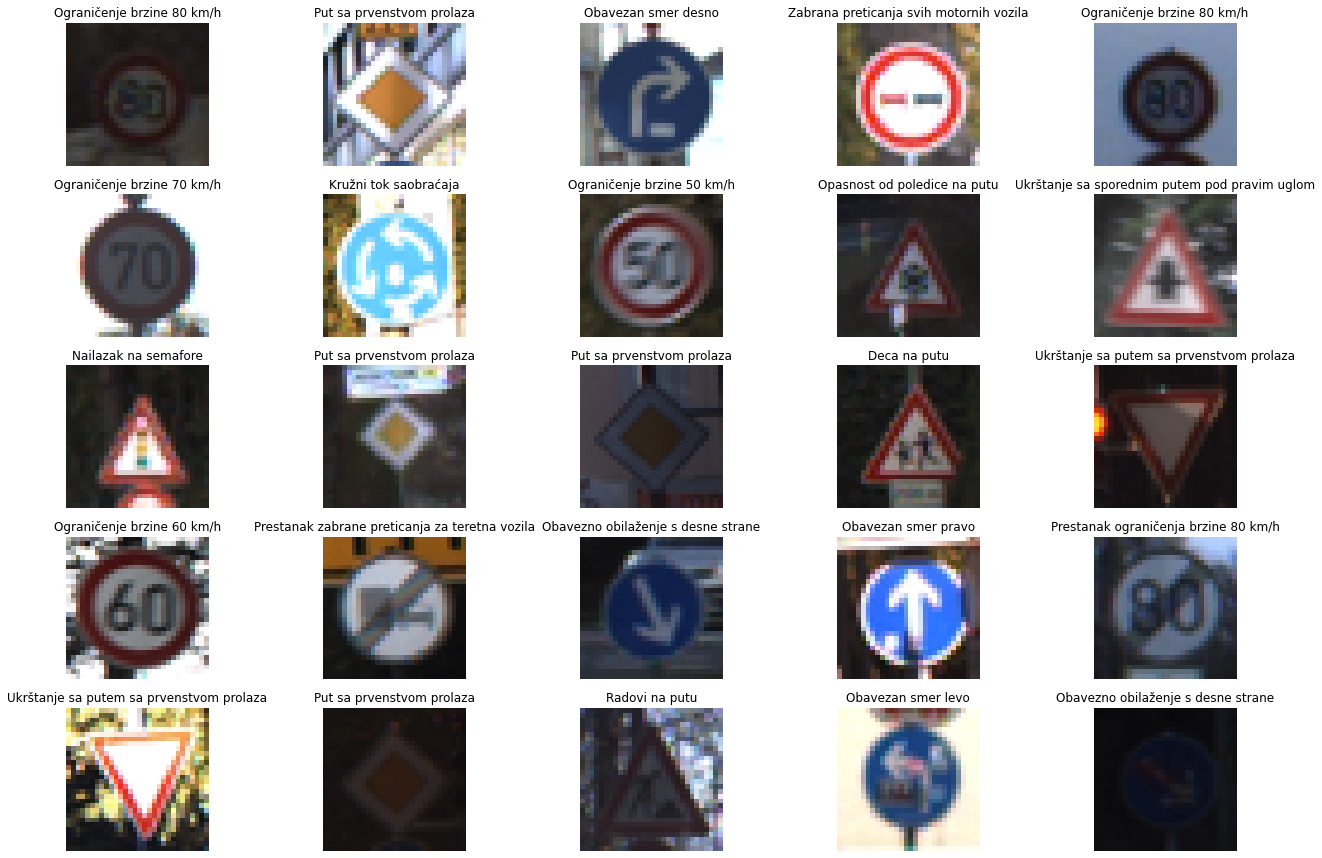

In [11]:
m=slike_train.shape[0]

np.random.seed(2)

indeksi=list(np.random.permutation(m))

Slike_permutovane=slike_train[indeksi,:,:,:]
Labele_permutovane=labele_train[:,indeksi]
rows=5
cols=5



f, axarr = plt.subplots(5,5)
#plt.rcParams["figure.figsize"] = (10,10)

plt.subplots_adjust(right=3,top=3)

k=0

for i in range(5):
  for j in range(5):
    axarr[i,j].imshow(Slike_permutovane[k])
    axarr[i,j].axis('off')
    labela=int(Labele_permutovane[:,k])
    axarr[i,j].set_title(klase[labela])
    
    k=k+1

plt.show()

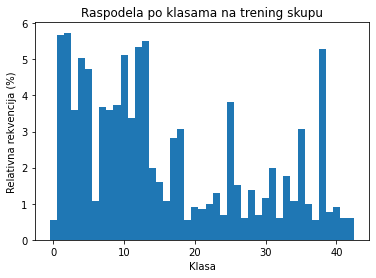

In [12]:
unique,counts=np.unique(labele_train,return_counts=True)
plt.bar(unique, counts/counts.sum()*100, 1)
plt.title('Raspodela po klasama na trening skupu')
plt.xlabel('Klasa')
plt.ylabel('Relativna rekvencija (%)')
plt.show()

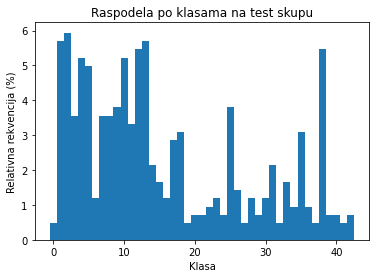

In [13]:
unique_test,counts_test=np.unique(labele_test,return_counts=True)
plt.bar(unique_test, counts_test/counts_test.sum()*100, 1)
plt.title('Raspodela po klasama na test skupu')
plt.xlabel('Klasa')
plt.ylabel('Relativna rekvencija (%)')
plt.show()

In [14]:
def vrati_tezine(counts):
  L=len(counts)

  maksimalna_vrednost=counts.max()

  tezine={
    
  }
  for i in range(L):
    tezine[i]=maksimalna_vrednost/counts[i]

  
  return tezine

tezine=vrati_tezine(counts)

tezine

{0: 10.714285714285714,
 1: 1.0135135135135136,
 2: 1.0,
 3: 1.5957446808510638,
 4: 1.1363636363636365,
 5: 1.2096774193548387,
 6: 5.357142857142857,
 7: 1.5625,
 8: 1.5957446808510638,
 9: 1.530612244897959,
 10: 1.1194029850746268,
 11: 1.7045454545454546,
 12: 1.0714285714285714,
 13: 1.0416666666666667,
 14: 2.8846153846153846,
 15: 3.5714285714285716,
 16: 5.357142857142857,
 17: 2.027027027027027,
 18: 1.875,
 19: 10.714285714285714,
 20: 6.25,
 21: 6.818181818181818,
 22: 5.769230769230769,
 23: 4.411764705882353,
 24: 8.333333333333334,
 25: 1.5,
 26: 3.75,
 27: 9.375,
 28: 4.166666666666667,
 29: 8.333333333333334,
 30: 5.0,
 31: 2.8846153846153846,
 32: 9.375,
 33: 3.265602322206096,
 34: 5.357142857142857,
 35: 1.875,
 36: 5.769230769230769,
 37: 10.714285714285714,
 38: 1.0869565217391304,
 39: 7.5,
 40: 6.25,
 41: 9.375,
 42: 9.375}

In [15]:
slike_train_norm=slike_train/255
slike_test_norm=slike_test/255

In [16]:
def one_hot_matrix(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [17]:
L=len(unique)

labele_train_one_hot=one_hot_matrix(labele_train,L).T
labele_test_one_hot=one_hot_matrix(labele_test,L).T

In [18]:

print(labele_train_one_hot.shape)
print(labele_test_one_hot.shape)

(39209, 43)
(12630, 43)


In [35]:
import tensorflow as tf
import random as rn 
import numpy as np
import keras
np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import MaxPooling2D, Conv2D, Dropout
from keras.optimizers import Adam

def napravi_model_v1(input_shape,broj_klasa,activation="relu",learning_rate=0.001):

  model=Sequential()

  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0),input_shape=input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(512,activation=activation))
  model.add(Dropout(0.5))
  model.add(Dense(512,activation=activation))
  model.add(Dropout(0.5))
  model.add(Dense(broj_klasa,activation="softmax"))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

  return model

In [36]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.001
bs=32

model1=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history1 = model1.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.2788 - accuracy: 0.0160 - val_loss: 3.7636 - val_accuracy: 0.0119
Epoch 2/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2795 - accuracy: 0.0120 - val_loss: 3.7619 - val_accuracy: 0.0523
Epoch 3/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2719 - accuracy: 0.0198 - val_loss: 3.7615 - val_accuracy: 0.0071
Epoch 4/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2506 - accuracy: 0.0240 - val_loss: 3.7613 - val_accuracy: 0.0594
Epoch 5/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.3177 - accuracy: 0.0217 - val_loss: 3.7600 - val_accuracy: 0.0594
Epoch 6/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.3335 - accuracy: 0.0165 - val_loss: 3.7592 - val_accuracy: 0.0546
Epoch 7/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2856 - accuracy: 0.0227 - val_loss: 3.7612 -

In [37]:
labele_pred1=model1.predict(x=slike_test_norm)
eval1=model1.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7630 - accuracy: 0.0356


In [38]:
model1.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


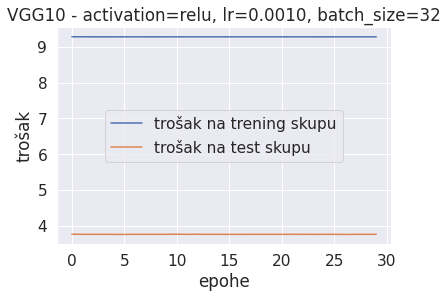

In [40]:
train_losses1=history1.history["loss"]
test_losses1=history1.history["val_loss"]

plt.plot(train_losses1,label="trošak na trening skupu")
plt.plot(test_losses1,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

labele_pred_conf1=np.argmax(labele_pred1, axis=1)

labele_test_conf1=labele_test.reshape(labele_pred_conf1.shape[0],)

conf1=confusion_matrix(labele_test_conf1,labele_pred_conf1)

conf1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

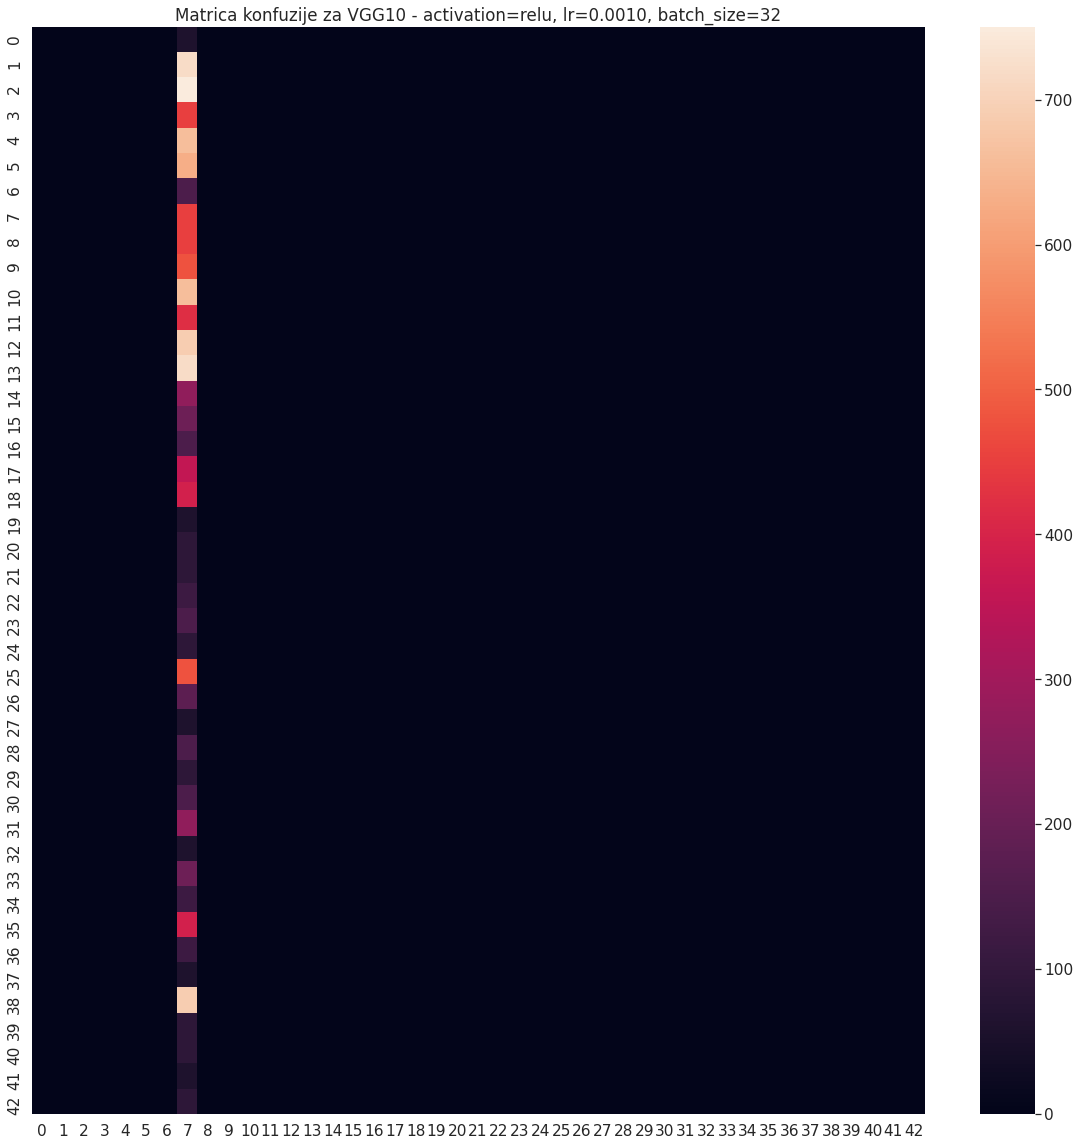

In [42]:
import seaborn as sn

df_cm = pd.DataFrame(conf1, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [43]:
from sklearn.metrics import classification_report

izvestaj1=classification_report(labele_test_conf1, labele_pred_conf1)

print(izvestaj1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       0.04      1.00      0.07       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.00      0.00      0.00       720
          14       0.00      0.00      0.00       270
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00       150
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.001
bs=64

model2=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history2 = model2.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 11s 17ms/step - loss: 9.2827 - accuracy: 0.0179 - val_loss: 3.7625 - val_accuracy: 0.0523
Epoch 2/30
613/613 [==============================] - 10s 16ms/step - loss: 9.2796 - accuracy: 0.0131 - val_loss: 3.7615 - val_accuracy: 0.0523
Epoch 3/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2714 - accuracy: 0.0233 - val_loss: 3.7615 - val_accuracy: 0.0048
Epoch 4/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2501 - accuracy: 0.0216 - val_loss: 3.7618 - val_accuracy: 0.0071
Epoch 5/30
613/613 [==============================] - 10s 17ms/step - loss: 9.3183 - accuracy: 0.0230 - val_loss: 3.7606 - val_accuracy: 0.0594
Epoch 6/30
613/613 [==============================] - 10s 17ms/step - loss: 9.3338 - accuracy: 0.0183 - val_loss: 3.7593 - val_accuracy: 0.0546
Epoch 7/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2839 - accuracy: 0.0227 - val_loss: 3.7612 - val_accuracy:

In [47]:
labele_pred2=model2.predict(x=slike_test_norm)
eval2=model2.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7622 - accuracy: 0.0285


In [48]:
model2.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


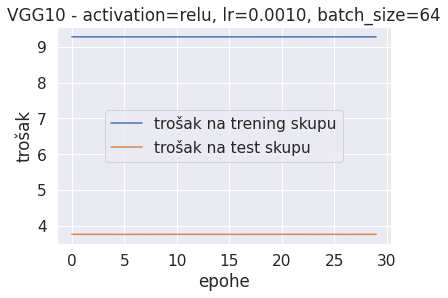

In [50]:
train_losses2=history2.history["loss"]
test_losses2=history2.history["val_loss"]

plt.plot(train_losses2,label="trošak na trening skupu")
plt.plot(test_losses2,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [52]:
labele_pred_conf2=np.argmax(labele_pred2, axis=1)

labele_test_conf2=labele_test.reshape(labele_pred_conf2.shape[0],)


In [53]:
izvestaj2=classification_report(labele_test_conf2, labele_pred_conf2)

print(izvestaj2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.00      0.00      0.00       720
          14       0.00      0.00      0.00       270
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00       150
          17       0.03    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.001
bs=128

model3=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history3 = model3.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 9s 28ms/step - loss: 9.2737 - accuracy: 0.0200 - val_loss: 3.5963 - val_accuracy: 0.0192
Epoch 2/30
307/307 [==============================] - 8s 27ms/step - loss: 7.7889 - accuracy: 0.0947 - val_loss: 1.8470 - val_accuracy: 0.3306
Epoch 3/30
307/307 [==============================] - 8s 28ms/step - loss: 3.9636 - accuracy: 0.4465 - val_loss: 0.9585 - val_accuracy: 0.6794
Epoch 4/30
307/307 [==============================] - 8s 28ms/step - loss: 1.3798 - accuracy: 0.7566 - val_loss: 0.5119 - val_accuracy: 0.8542
Epoch 5/30
307/307 [==============================] - 9s 28ms/step - loss: 0.5335 - accuracy: 0.9039 - val_loss: 0.3463 - val_accuracy: 0.9086
Epoch 6/30
307/307 [==============================] - 9s 28ms/step - loss: 0.3150 - accuracy: 0.9495 - val_loss: 0.4508 - val_accuracy: 0.8926
Epoch 7/30
307/307 [==============================] - 9s 28ms/step - loss: 0.2897 - accuracy: 0.9550 - val_loss: 0.2146 - val_accuracy: 0.9419

In [55]:
history3=history2
model3=model2

In [56]:
labele_pred3=model3.predict(x=slike_test_norm)
eval3=model3.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2065 - accuracy: 0.9668


In [57]:
model3.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


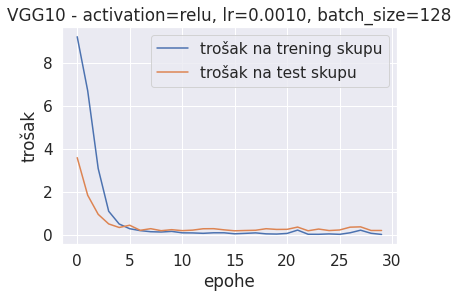

In [58]:
train_losses3=history3.history["loss"]
test_losses3=history3.history["val_loss"]

plt.plot(train_losses3,label="trošak na trening skupu")
plt.plot(test_losses3,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [59]:
labele_pred_conf3=np.argmax(labele_pred3, axis=1)

labele_test_conf3=labele_test.reshape(labele_pred_conf3.shape[0],)

conf3=confusion_matrix(labele_test_conf3,labele_pred_conf3)

conf3

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 701,   0, ...,   0,   0,   0],
       [  0,   5, 744, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  86,   0,   0],
       [  0,   0,   0, ...,   0,  56,   0],
       [  0,   0,   0, ...,   0,   0,  89]])

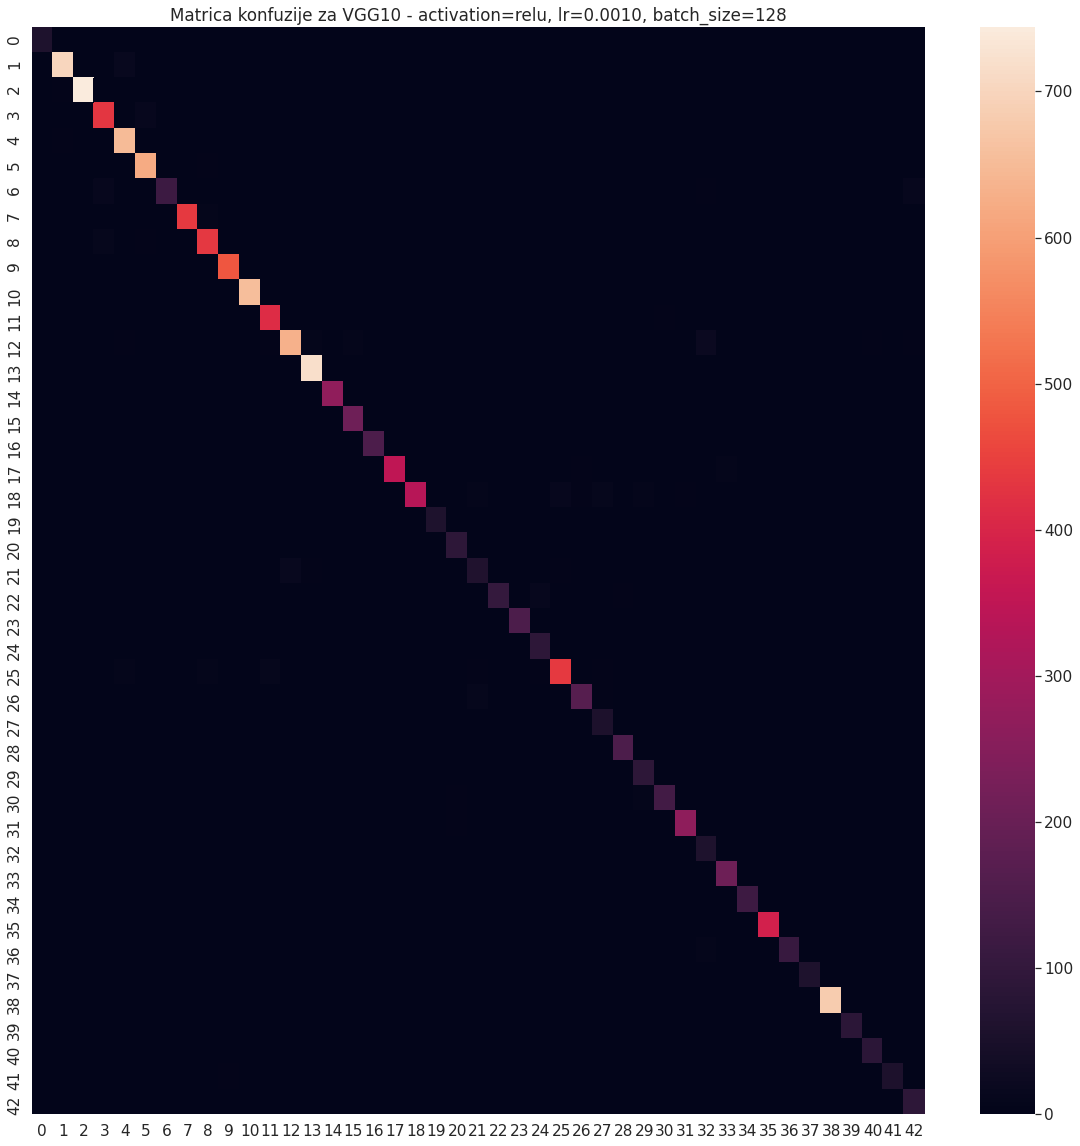

In [60]:
df_cm = pd.DataFrame(conf3, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [61]:
izvestaj3=classification_report(labele_test_conf3, labele_pred_conf3)

print(izvestaj3)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.98      0.97      0.98       720
           2       1.00      0.99      0.99       750
           3       0.94      0.96      0.95       450
           4       0.96      0.98      0.97       660
           5       0.96      0.99      0.97       630
           6       1.00      0.79      0.88       150
           7       0.99      0.97      0.98       450
           8       0.95      0.97      0.96       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.97      0.99      0.98       420
          12       0.97      0.92      0.94       690
          13       0.97      1.00      0.98       720
          14       0.99      1.00      0.99       270
          15       0.96      1.00      0.98       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [62]:

np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.001
bs=256

model4=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history4 = model4.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 9s 51ms/step - loss: 9.2707 - accuracy: 0.0213 - val_loss: 3.7559 - val_accuracy: 0.0408
Epoch 2/30
154/154 [==============================] - 8s 49ms/step - loss: 8.8547 - accuracy: 0.0371 - val_loss: 2.9306 - val_accuracy: 0.0850
Epoch 3/30
154/154 [==============================] - 8s 50ms/step - loss: 6.1272 - accuracy: 0.1938 - val_loss: 1.4968 - val_accuracy: 0.4781
Epoch 4/30
154/154 [==============================] - 8s 50ms/step - loss: 2.8154 - accuracy: 0.5616 - val_loss: 0.7592 - val_accuracy: 0.7522
Epoch 5/30
154/154 [==============================] - 8s 51ms/step - loss: 0.9326 - accuracy: 0.8352 - val_loss: 0.4552 - val_accuracy: 0.8713
Epoch 6/30
154/154 [==============================] - 8s 51ms/step - loss: 0.4274 - accuracy: 0.9284 - val_loss: 0.3553 - val_accuracy: 0.9157
Epoch 7/30
154/154 [==============================] - 8s 51ms/step - loss: 0.2106 - accuracy: 0.9677 - val_loss: 0.3038 - val_accuracy: 0.9385

In [63]:
labele_pred4=model4.predict(x=slike_test_norm)
eval4=model4.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.3166 - accuracy: 0.9490


In [64]:
model4.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


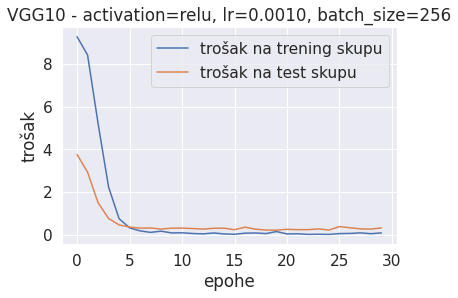

In [65]:
train_losses4=history4.history["loss"]
test_losses4=history4.history["val_loss"]

plt.plot(train_losses4,label="trošak na trening skupu")
plt.plot(test_losses4,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

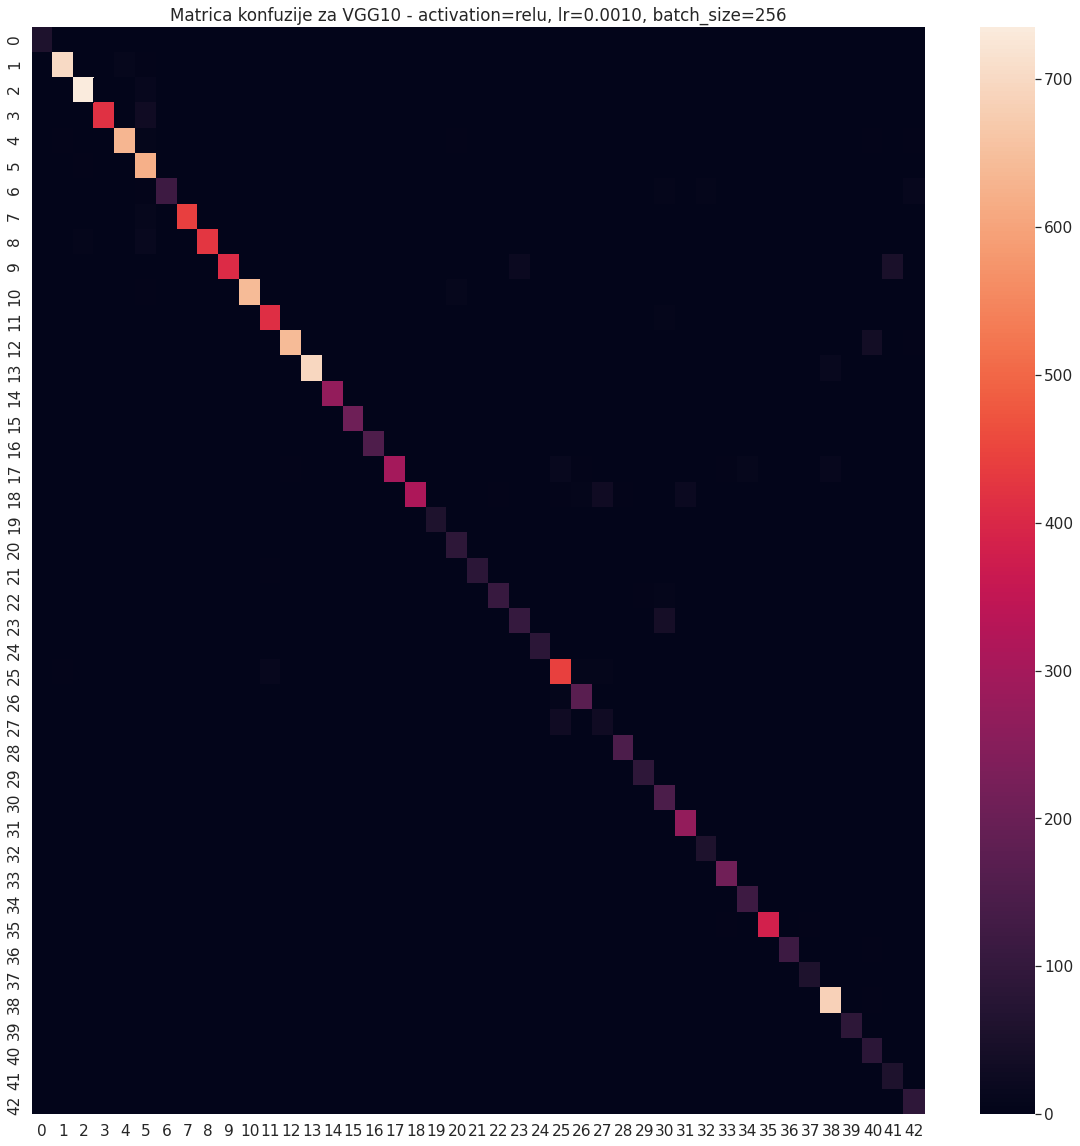

In [66]:

labele_pred_conf4=np.argmax(labele_pred4, axis=1)

labele_test_conf4=labele_test.reshape(labele_pred_conf4.shape[0],)

conf4=confusion_matrix(labele_test_conf4,labele_pred_conf4)

df_cm = pd.DataFrame(conf4, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [67]:
izvestaj4=classification_report(labele_test_conf4, labele_pred_conf4)
print(izvestaj4)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.99      0.98      0.98       720
           2       0.98      0.98      0.98       750
           3       0.99      0.93      0.96       450
           4       0.98      0.96      0.97       660
           5       0.88      0.99      0.93       630
           6       0.99      0.79      0.88       150
           7       0.99      0.98      0.98       450
           8       1.00      0.94      0.97       450
           9       0.99      0.85      0.91       480
          10       1.00      0.97      0.98       660
          11       0.95      0.98      0.97       420
          12       0.99      0.93      0.96       690
          13       1.00      0.97      0.98       720
          14       0.99      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [70]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.01
bs=32

model5=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history5 = model5.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 34.7969 - accuracy: 0.0172 - val_loss: 3.7747 - val_accuracy: 0.0119
Epoch 2/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2873 - accuracy: 0.0145 - val_loss: 3.7579 - val_accuracy: 0.0356
Epoch 3/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2816 - accuracy: 0.0147 - val_loss: 3.7670 - val_accuracy: 0.0071
Epoch 4/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2595 - accuracy: 0.0194 - val_loss: 3.7525 - val_accuracy: 0.0071
Epoch 5/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.3266 - accuracy: 0.0141 - val_loss: 3.7512 - val_accuracy: 0.0546
Epoch 6/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.3416 - accuracy: 0.0123 - val_loss: 3.7586 - val_accuracy: 0.0356
Epoch 7/30
1226/1226 [==============================] - 13s 11ms/step - loss: 9.2948 - accuracy: 0.0183 - val_loss: 3.7595 

In [71]:
labele_pred5=model5.predict(x=slike_test_norm)
eval5=model5.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7746 - accuracy: 0.0214


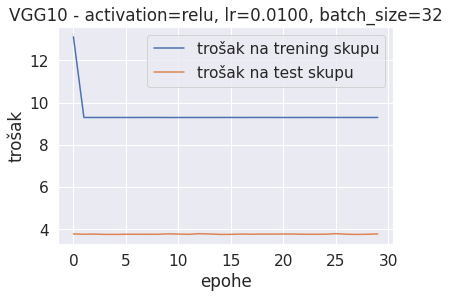

In [72]:
train_losses5=history5.history["loss"]
test_losses5=history5.history["val_loss"]

plt.plot(train_losses5,label="trošak na trening skupu")
plt.plot(test_losses5,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [74]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.01
bs=64

model6=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history6 = model6.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)


Epoch 1/30
613/613 [==============================] - 11s 17ms/step - loss: 43.3861 - accuracy: 0.0168 - val_loss: 3.7744 - val_accuracy: 0.0119
Epoch 2/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2858 - accuracy: 0.0137 - val_loss: 3.7595 - val_accuracy: 0.0523
Epoch 3/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2782 - accuracy: 0.0153 - val_loss: 3.7625 - val_accuracy: 0.0071
Epoch 4/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2566 - accuracy: 0.0186 - val_loss: 3.7547 - val_accuracy: 0.0071
Epoch 5/30
613/613 [==============================] - 10s 17ms/step - loss: 9.3245 - accuracy: 0.0155 - val_loss: 3.7523 - val_accuracy: 0.0546
Epoch 6/30
613/613 [==============================] - 10s 17ms/step - loss: 9.3397 - accuracy: 0.0137 - val_loss: 3.7556 - val_accuracy: 0.0356
Epoch 7/30
613/613 [==============================] - 10s 17ms/step - loss: 9.2903 - accuracy: 0.0195 - val_loss: 3.7626 - val_accuracy

In [75]:
labele_pred6=model6.predict(x=slike_test_norm)
eval6=model6.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7717 - accuracy: 0.0214


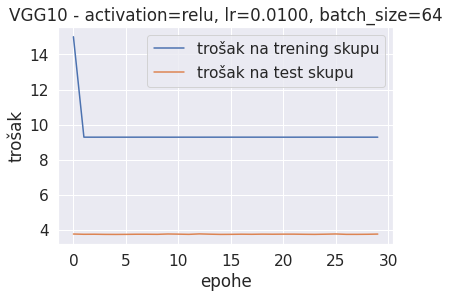

In [76]:
train_losses6=history6.history["loss"]
test_losses6=history6.history["val_loss"]

plt.plot(train_losses6,label="trošak na trening skupu")
plt.plot(test_losses6,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [77]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.01
bs=128

model7=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history7 = model7.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)


Epoch 1/30
307/307 [==============================] - 9s 28ms/step - loss: 59.8212 - accuracy: 0.0208 - val_loss: 3.8051 - val_accuracy: 0.0071
Epoch 2/30
307/307 [==============================] - 8s 27ms/step - loss: 9.2855 - accuracy: 0.0080 - val_loss: 3.7648 - val_accuracy: 0.0048
Epoch 3/30
307/307 [==============================] - 8s 27ms/step - loss: 9.2741 - accuracy: 0.0107 - val_loss: 3.7619 - val_accuracy: 0.0071
Epoch 4/30
307/307 [==============================] - 8s 27ms/step - loss: 9.2551 - accuracy: 0.0157 - val_loss: 3.7592 - val_accuracy: 0.0071
Epoch 5/30
307/307 [==============================] - 8s 27ms/step - loss: 9.3255 - accuracy: 0.0191 - val_loss: 3.7576 - val_accuracy: 0.0546
Epoch 6/30
307/307 [==============================] - 8s 27ms/step - loss: 9.3395 - accuracy: 0.0133 - val_loss: 3.7556 - val_accuracy: 0.0356
Epoch 7/30
307/307 [==============================] - 8s 27ms/step - loss: 9.2890 - accuracy: 0.0224 - val_loss: 3.7652 - val_accuracy: 0.007

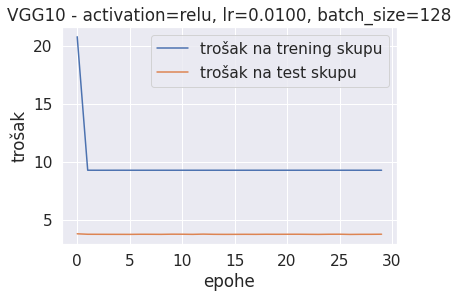

In [78]:
train_losses7=history7.history["loss"]
test_losses7=history7.history["val_loss"]

plt.plot(train_losses7,label="trošak na trening skupu")
plt.plot(test_losses7,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [79]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.01
bs=256

model8=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history8 = model8.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)


Epoch 1/30
154/154 [==============================] - 8s 50ms/step - loss: 66.2630 - accuracy: 0.0205 - val_loss: 3.7828 - val_accuracy: 0.0071
Epoch 2/30
154/154 [==============================] - 7s 48ms/step - loss: 9.2812 - accuracy: 0.0073 - val_loss: 3.7643 - val_accuracy: 0.0095
Epoch 3/30
154/154 [==============================] - 7s 48ms/step - loss: 9.2728 - accuracy: 0.0122 - val_loss: 3.7652 - val_accuracy: 0.0071
Epoch 4/30
154/154 [==============================] - 7s 49ms/step - loss: 9.2535 - accuracy: 0.0097 - val_loss: 3.7605 - val_accuracy: 0.0071
Epoch 5/30
154/154 [==============================] - 7s 48ms/step - loss: 9.3235 - accuracy: 0.0194 - val_loss: 3.7611 - val_accuracy: 0.0048
Epoch 6/30
154/154 [==============================] - 7s 49ms/step - loss: 9.3403 - accuracy: 0.0087 - val_loss: 3.7547 - val_accuracy: 0.0570
Epoch 7/30
154/154 [==============================] - 7s 48ms/step - loss: 9.2913 - accuracy: 0.0248 - val_loss: 3.7650 - val_accuracy: 0.011

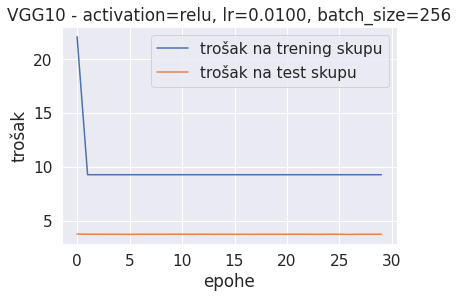

In [80]:
train_losses8=history8.history["loss"]
test_losses8=history8.history["val_loss"]

plt.plot(train_losses8,label="trošak na trening skupu")
plt.plot(test_losses8,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [83]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.0001
bs=32

model9=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history9 = model9.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 8.7106 - accuracy: 0.0574 - val_loss: 1.9522 - val_accuracy: 0.3372
Epoch 2/30
1226/1226 [==============================] - 13s 11ms/step - loss: 4.6293 - accuracy: 0.3835 - val_loss: 0.8603 - val_accuracy: 0.7039
Epoch 3/30
1226/1226 [==============================] - 13s 11ms/step - loss: 1.6027 - accuracy: 0.7351 - val_loss: 0.4679 - val_accuracy: 0.8619
Epoch 4/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.7224 - accuracy: 0.8840 - val_loss: 0.3685 - val_accuracy: 0.9002
Epoch 5/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.4107 - accuracy: 0.9329 - val_loss: 0.3052 - val_accuracy: 0.9182
Epoch 6/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.2924 - accuracy: 0.9541 - val_loss: 0.3174 - val_accuracy: 0.9249
Epoch 7/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.1878 - accuracy: 0.9686 - val_loss: 0.3269 -

In [84]:
labele_pred9=model9.predict(x=slike_test_norm)
eval9=model9.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2239 - accuracy: 0.9643


In [85]:
model9.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


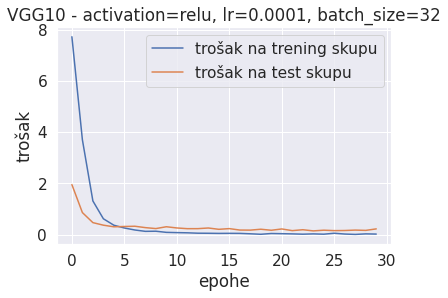

In [86]:
train_losses9=history9.history["loss"]
test_losses9=history9.history["val_loss"]

plt.plot(train_losses9,label="trošak na trening skupu")
plt.plot(test_losses9,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

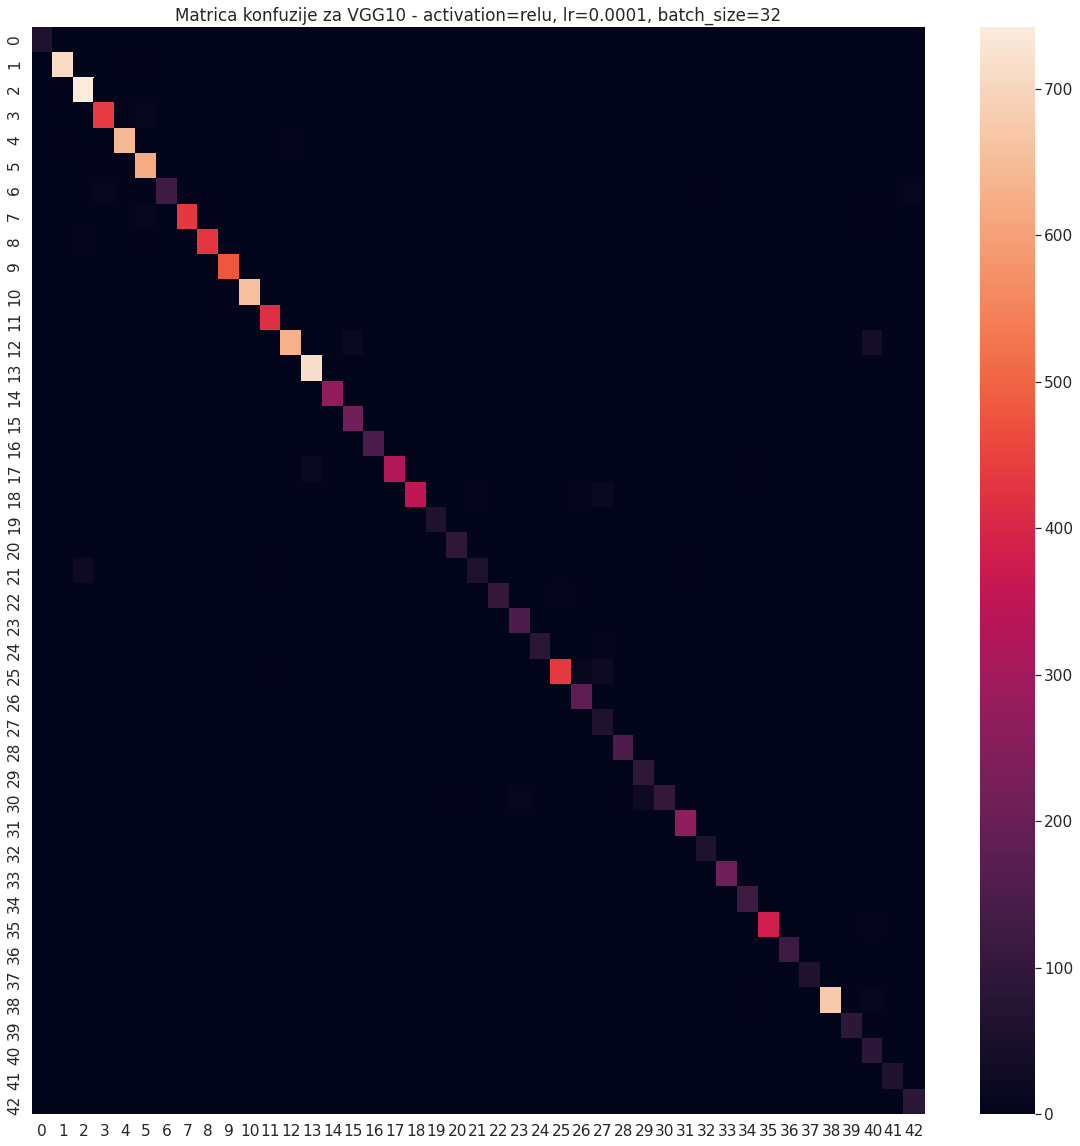

In [87]:
labele_pred_conf9=np.argmax(labele_pred9, axis=1)

labele_test_conf9=labele_test.reshape(labele_pred_conf9.shape[0],)

conf9=confusion_matrix(labele_test_conf9,labele_pred_conf9)

df_cm = pd.DataFrame(conf9, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [88]:
izvestaj9=classification_report(labele_test_conf9, labele_pred_conf9)

print(izvestaj9)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.98      0.99       720
           2       0.95      0.99      0.97       750
           3       0.95      0.97      0.96       450
           4       0.99      0.98      0.98       660
           5       0.95      0.98      0.97       630
           6       1.00      0.82      0.90       150
           7       0.99      0.96      0.98       450
           8       0.98      0.96      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.98      0.99      0.99       420
          12       0.98      0.91      0.95       690
          13       0.96      1.00      0.98       720
          14       0.99      1.00      1.00       270
          15       0.90      1.00      0.94       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [89]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.0001
bs=64

model10=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history10 = model10.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 11s 17ms/step - loss: 8.8752 - accuracy: 0.0442 - val_loss: 2.2277 - val_accuracy: 0.2783
Epoch 2/30
613/613 [==============================] - 10s 17ms/step - loss: 5.6414 - accuracy: 0.3068 - val_loss: 1.2598 - val_accuracy: 0.5869
Epoch 3/30
613/613 [==============================] - 10s 17ms/step - loss: 2.7084 - accuracy: 0.6026 - val_loss: 0.6433 - val_accuracy: 0.8124
Epoch 4/30
613/613 [==============================] - 11s 17ms/step - loss: 1.2743 - accuracy: 0.7928 - val_loss: 0.4131 - val_accuracy: 0.8748
Epoch 5/30
613/613 [==============================] - 11s 17ms/step - loss: 0.6958 - accuracy: 0.8872 - val_loss: 0.3483 - val_accuracy: 0.8949
Epoch 6/30
613/613 [==============================] - 11s 17ms/step - loss: 0.4785 - accuracy: 0.9230 - val_loss: 0.2872 - val_accuracy: 0.9187
Epoch 7/30
613/613 [==============================] - 11s 17ms/step - loss: 0.3229 - accuracy: 0.9479 - val_loss: 0.2469 - val_accuracy:

In [90]:
labele_pred10=model10.predict(x=slike_test_norm)
eval10=model10.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1514 - accuracy: 0.9656


In [91]:
model10.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


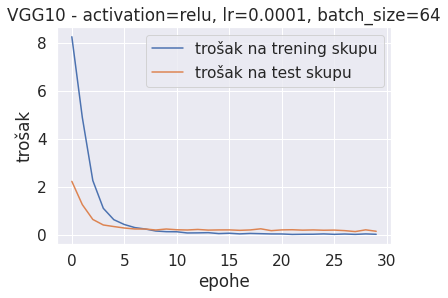

In [92]:
train_losses10=history10.history["loss"]
test_losses10=history10.history["val_loss"]

plt.plot(train_losses10,label="trošak na trening skupu")
plt.plot(test_losses10,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

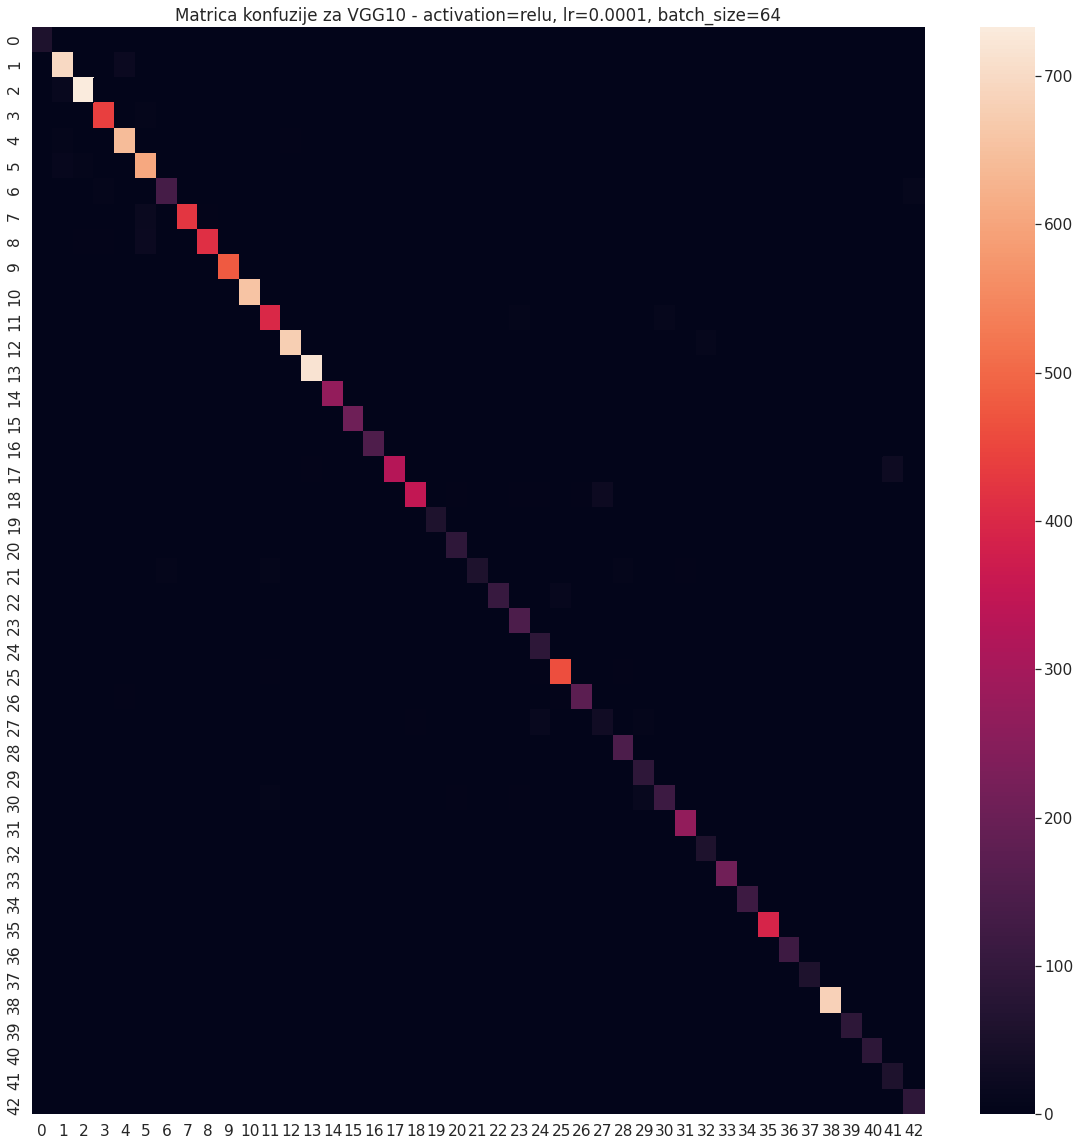

In [93]:
labele_pred_conf10=np.argmax(labele_pred10, axis=1)

labele_test_conf10=labele_test.reshape(labele_pred_conf10.shape[0],)

conf10=confusion_matrix(labele_test_conf10,labele_pred_conf10)

df_cm = pd.DataFrame(conf10, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [94]:
izvestaj10=classification_report(labele_test_conf10, labele_pred_conf10)

print(izvestaj10)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.95      0.97      0.96       720
           2       0.98      0.98      0.98       750
           3       0.97      0.98      0.97       450
           4       0.96      0.98      0.97       660
           5       0.93      0.96      0.95       630
           6       0.94      0.89      0.91       150
           7       1.00      0.94      0.97       450
           8       0.99      0.92      0.95       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      0.99       660
          11       0.95      0.95      0.95       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      0.99      0.99       210
          16       0.96      1.00      0.98       150
          17       1.00    

In [95]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.0001
bs=128


model11=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history11 = model11.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 29ms/step - loss: 9.0523 - accuracy: 0.0318 - val_loss: 2.9538 - val_accuracy: 0.1826
Epoch 2/30
307/307 [==============================] - 9s 29ms/step - loss: 7.0413 - accuracy: 0.1826 - val_loss: 1.8110 - val_accuracy: 0.4243
Epoch 3/30
307/307 [==============================] - 9s 29ms/step - loss: 4.4583 - accuracy: 0.4175 - val_loss: 1.1974 - val_accuracy: 0.6098
Epoch 4/30
307/307 [==============================] - 9s 29ms/step - loss: 2.5884 - accuracy: 0.6111 - val_loss: 0.7434 - val_accuracy: 0.7705
Epoch 5/30
307/307 [==============================] - 9s 29ms/step - loss: 1.5639 - accuracy: 0.7489 - val_loss: 0.5505 - val_accuracy: 0.8352
Epoch 6/30
307/307 [==============================] - 9s 29ms/step - loss: 1.0319 - accuracy: 0.8272 - val_loss: 0.4397 - val_accuracy: 0.8658
Epoch 7/30
307/307 [==============================] - 9s 29ms/step - loss: 0.6461 - accuracy: 0.8884 - val_loss: 0.3881 - val_accuracy: 0.887

In [96]:
labele_pred11=model11.predict(x=slike_test_norm)
eval11=model11.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2622 - accuracy: 0.9489


In [97]:
model11.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


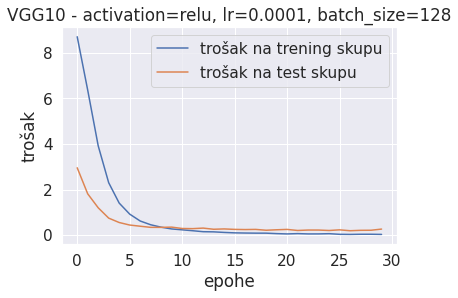

In [98]:
train_losses11=history11.history["loss"]
test_losses11=history11.history["val_loss"]

plt.plot(train_losses11,label="trošak na trening skupu")
plt.plot(test_losses11,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [99]:
labele_pred_conf11=np.argmax(labele_pred11, axis=1)

labele_test_conf11=labele_test.reshape(labele_pred_conf11.shape[0],)

conf11=confusion_matrix(labele_test_conf11,labele_pred_conf11)

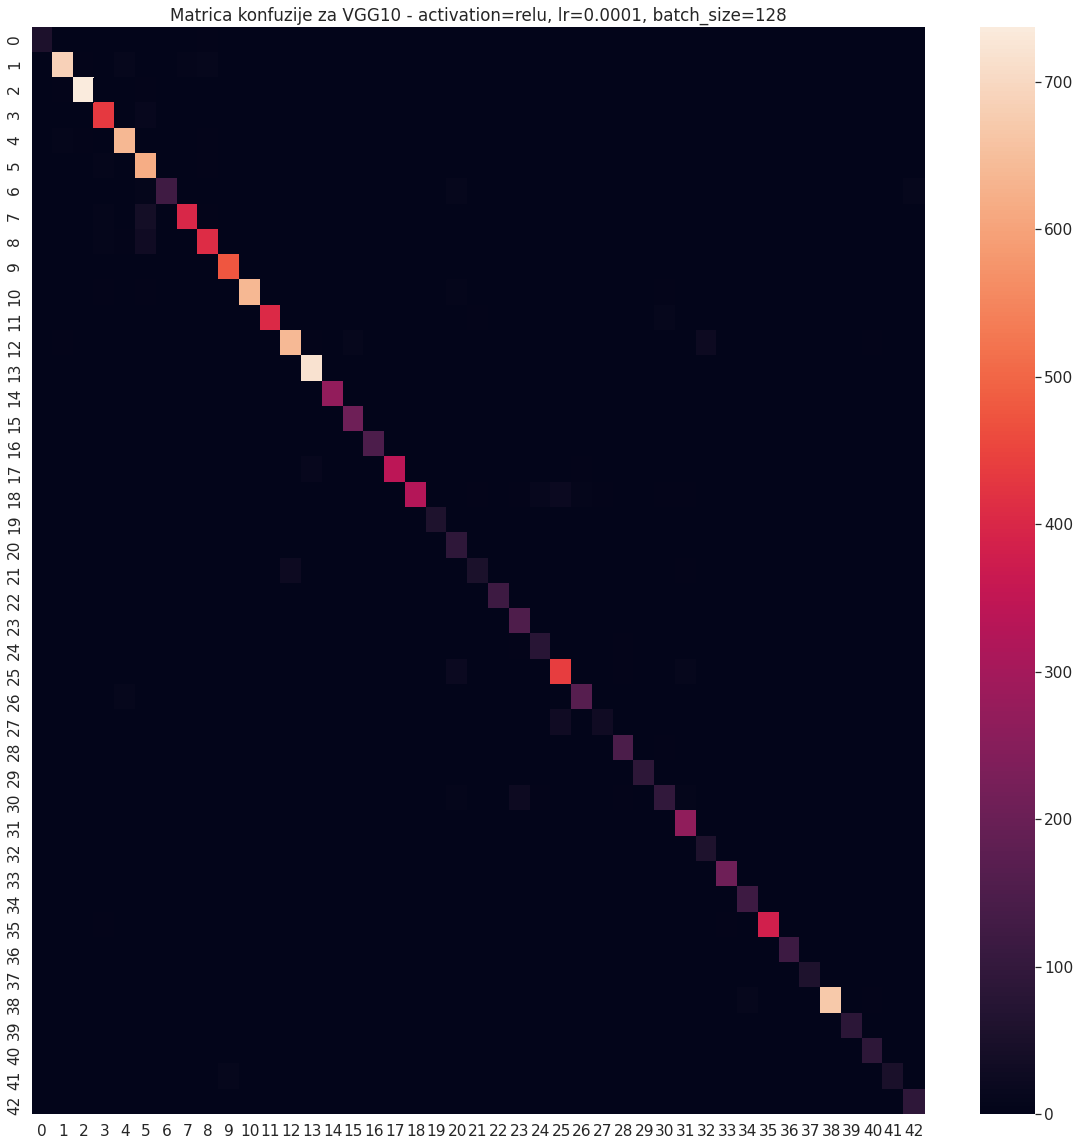

In [100]:
df_cm = pd.DataFrame(conf11, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [101]:
izvestaj11=classification_report(labele_test_conf11, labele_pred_conf11)

print(izvestaj11)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.98      0.96      0.97       720
           2       0.99      0.98      0.98       750
           3       0.94      0.96      0.95       450
           4       0.96      0.97      0.96       660
           5       0.86      0.98      0.92       630
           6       0.98      0.82      0.89       150
           7       0.97      0.89      0.93       450
           8       0.94      0.91      0.93       450
           9       0.98      0.99      0.99       480
          10       1.00      0.97      0.98       660
          11       0.99      0.96      0.98       420
          12       0.96      0.93      0.94       690
          13       0.97      1.00      0.98       720
          14       0.99      1.00      1.00       270
          15       0.96      0.99      0.97       210
          16       0.98      0.99      0.99       150
          17       1.00    

In [102]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.0001
bs=256


model12=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history12 = model12.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 9s 53ms/step - loss: 9.1339 - accuracy: 0.0334 - val_loss: 3.3345 - val_accuracy: 0.0578
Epoch 2/30
154/154 [==============================] - 8s 51ms/step - loss: 7.8805 - accuracy: 0.1118 - val_loss: 2.3328 - val_accuracy: 0.2839
Epoch 3/30
154/154 [==============================] - 8s 52ms/step - loss: 5.8271 - accuracy: 0.2955 - val_loss: 1.5660 - val_accuracy: 0.4950
Epoch 4/30
154/154 [==============================] - 8s 52ms/step - loss: 3.7604 - accuracy: 0.4815 - val_loss: 1.0923 - val_accuracy: 0.6664
Epoch 5/30
154/154 [==============================] - 8s 53ms/step - loss: 2.5292 - accuracy: 0.6183 - val_loss: 0.7680 - val_accuracy: 0.7587
Epoch 6/30
154/154 [==============================] - 8s 53ms/step - loss: 1.7318 - accuracy: 0.7270 - val_loss: 0.5990 - val_accuracy: 0.8128
Epoch 7/30
154/154 [==============================] - 8s 53ms/step - loss: 1.1959 - accuracy: 0.7963 - val_loss: 0.4868 - val_accuracy: 0.8484

In [103]:
labele_pred12=model12.predict(x=slike_test_norm)
eval12=model12.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2494 - accuracy: 0.9408


In [104]:
model12.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


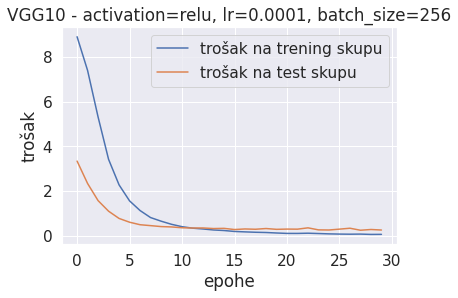

In [105]:
train_losses12=history12.history["loss"]
test_losses12=history12.history["val_loss"]

plt.plot(train_losses12,label="trošak na trening skupu")
plt.plot(test_losses12,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

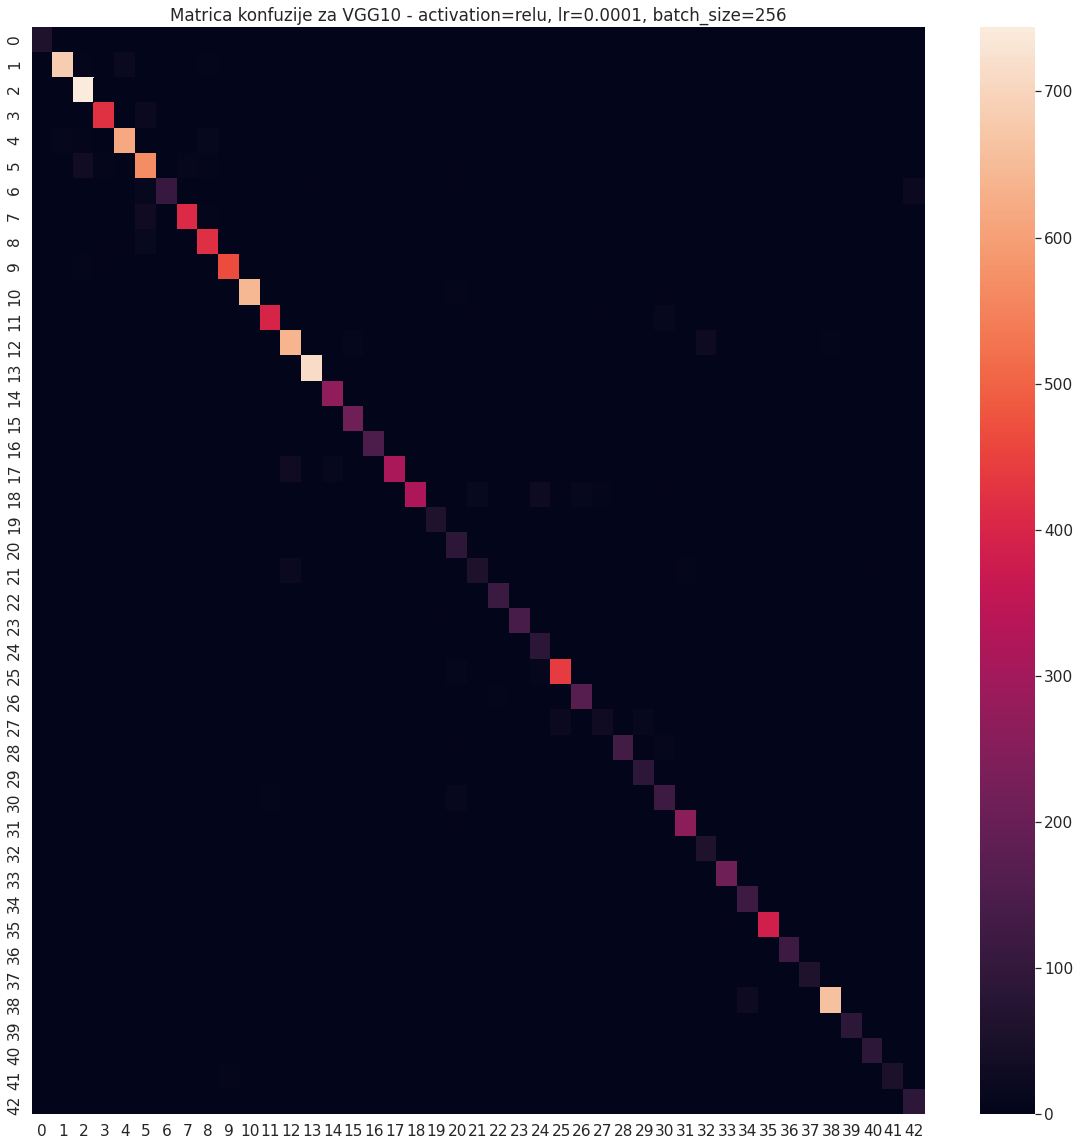

In [106]:
labele_pred_conf12=np.argmax(labele_pred12, axis=1)

labele_test_conf12=labele_test.reshape(labele_pred_conf12.shape[0],)

conf12=confusion_matrix(labele_test_conf12,labele_pred_conf12)

df_cm = pd.DataFrame(conf12, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [107]:
izvestaj12=classification_report(labele_test_conf12, labele_pred_conf12)

print(izvestaj12)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.96      0.95      0.96       720
           2       0.93      0.99      0.96       750
           3       0.96      0.94      0.95       450
           4       0.96      0.94      0.95       660
           5       0.87      0.90      0.88       630
           6       1.00      0.73      0.85       150
           7       0.95      0.90      0.93       450
           8       0.93      0.94      0.93       450
           9       0.99      0.97      0.98       480
          10       1.00      0.98      0.99       660
          11       0.98      0.95      0.96       420
          12       0.92      0.92      0.92       690
          13       0.99      0.99      0.99       720
          14       0.95      1.00      0.97       270
          15       0.94      1.00      0.97       210
          16       0.98      1.00      0.99       150
          17       0.99    

In [108]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="sigmoid"
lr=0.0001
bs=32


model13=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history13 = model13.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 15s 12ms/step - loss: 9.7752 - accuracy: 0.0226 - val_loss: 3.7774 - val_accuracy: 0.0119
Epoch 2/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.3676 - accuracy: 0.0209 - val_loss: 3.7599 - val_accuracy: 0.0523
Epoch 3/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.3060 - accuracy: 0.0199 - val_loss: 3.7616 - val_accuracy: 0.0071
Epoch 4/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.2661 - accuracy: 0.0192 - val_loss: 3.7609 - val_accuracy: 0.0071
Epoch 5/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.3252 - accuracy: 0.0212 - val_loss: 3.7606 - val_accuracy: 0.0048
Epoch 6/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.3398 - accuracy: 0.0183 - val_loss: 3.7579 - val_accuracy: 0.0546
Epoch 7/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.2895 - accuracy: 0.0242 - val_loss: 3.7622 -

In [109]:
labele_pred13=model13.predict(x=slike_test_norm)
eval13=model13.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7618 - accuracy: 0.0048


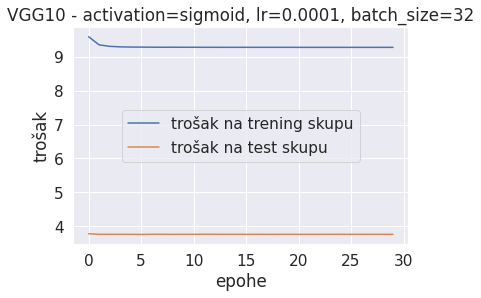

In [111]:
train_losses13=history13.history["loss"]
test_losses13=history13.history["val_loss"]

plt.plot(train_losses13,label="trošak na trening skupu")
plt.plot(test_losses13,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [122]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.001
bs=32


model14=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history14 = model14.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 15s 11ms/step - loss: 11.2187 - accuracy: 0.0222 - val_loss: 3.7828 - val_accuracy: 0.0071
Epoch 2/30
1226/1226 [==============================] - 14s 11ms/step - loss: 10.3885 - accuracy: 0.0164 - val_loss: 3.8058 - val_accuracy: 0.0119
Epoch 3/30
1226/1226 [==============================] - 14s 11ms/step - loss: 10.1023 - accuracy: 0.0140 - val_loss: 3.8357 - val_accuracy: 0.0048
Epoch 4/30
1226/1226 [==============================] - 14s 12ms/step - loss: 9.9715 - accuracy: 0.0144 - val_loss: 3.8017 - val_accuracy: 0.0309
Epoch 5/30
1226/1226 [==============================] - 14s 12ms/step - loss: 9.9910 - accuracy: 0.0142 - val_loss: 3.7871 - val_accuracy: 0.0048
Epoch 6/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.9619 - accuracy: 0.0131 - val_loss: 3.8677 - val_accuracy: 0.0071
Epoch 7/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.9961 - accuracy: 0.0130 - val_loss: 3.767

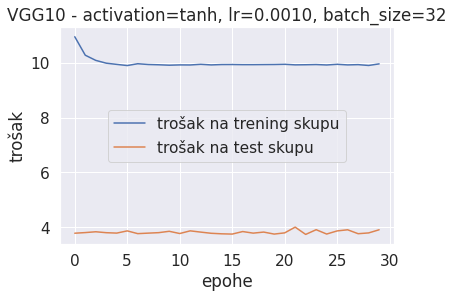

In [124]:
train_losses14=history14.history["loss"]
test_losses14=history14.history["val_loss"]

plt.plot(train_losses14,label="trošak na trening skupu")
plt.plot(test_losses14,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [125]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.001
bs=64


model15=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history15 = model15.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 12s 18ms/step - loss: 5.8589 - accuracy: 0.3350 - val_loss: 0.4742 - val_accuracy: 0.8660
Epoch 2/30
613/613 [==============================] - 11s 18ms/step - loss: 0.7235 - accuracy: 0.8910 - val_loss: 0.3635 - val_accuracy: 0.9105
Epoch 3/30
613/613 [==============================] - 11s 18ms/step - loss: 0.4522 - accuracy: 0.9351 - val_loss: 0.3966 - val_accuracy: 0.9017
Epoch 4/30
613/613 [==============================] - 11s 18ms/step - loss: 0.4231 - accuracy: 0.9379 - val_loss: 0.3124 - val_accuracy: 0.9281
Epoch 5/30
613/613 [==============================] - 11s 18ms/step - loss: 0.3565 - accuracy: 0.9503 - val_loss: 0.3162 - val_accuracy: 0.9244
Epoch 6/30
613/613 [==============================] - 11s 18ms/step - loss: 0.3321 - accuracy: 0.9498 - val_loss: 0.2982 - val_accuracy: 0.9331
Epoch 7/30
613/613 [==============================] - 11s 18ms/step - loss: 0.4031 - accuracy: 0.9403 - val_loss: 0.3770 - val_accuracy:

In [126]:
labele_pred15=model15.predict(x=slike_test_norm)
eval15=model15.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.4311 - accuracy: 0.9080


In [127]:
model15.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


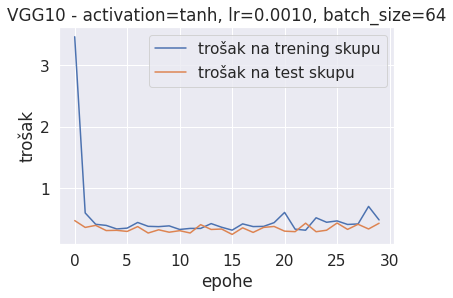

In [128]:
train_losses15=history15.history["loss"]
test_losses15=history15.history["val_loss"]

plt.plot(train_losses15,label="trošak na trening skupu")
plt.plot(test_losses15,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [129]:
labele_pred_conf15=np.argmax(labele_pred15, axis=1)

labele_test_conf15=labele_test.reshape(labele_pred_conf15.shape[0],)

conf15=confusion_matrix(labele_test_conf15,labele_pred_conf15)

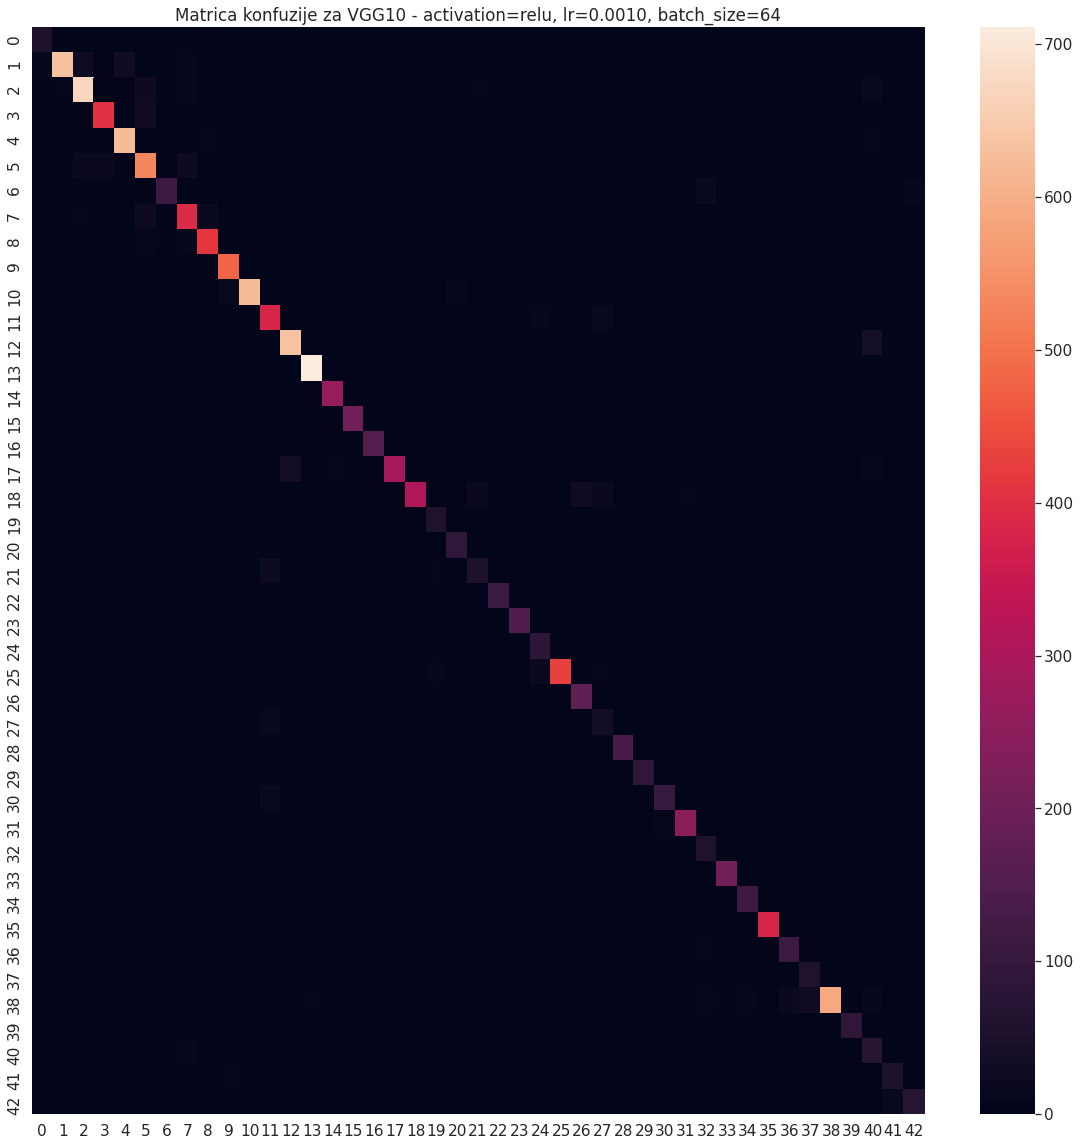

In [130]:
df_cm = pd.DataFrame(conf15, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [131]:
izvestaj15=classification_report(labele_test_conf15, labele_pred_conf15)

print(izvestaj15)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        60
           1       0.98      0.88      0.92       720
           2       0.91      0.90      0.90       750
           3       0.95      0.90      0.92       450
           4       0.94      0.94      0.94       660
           5       0.85      0.85      0.85       630
           6       0.97      0.77      0.86       150
           7       0.85      0.87      0.86       450
           8       0.90      0.92      0.91       450
           9       0.95      1.00      0.97       480
          10       0.99      0.94      0.97       660
          11       0.86      0.91      0.88       420
          12       0.93      0.92      0.93       690
          13       0.96      0.99      0.97       720
          14       0.96      0.99      0.98       270
          15       0.96      0.99      0.97       210
          16       0.96      1.00      0.98       150
          17       0.99    

In [132]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.001
bs=128


model16=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history16 = model16.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 32ms/step - loss: 5.7476 - accuracy: 0.3439 - val_loss: 0.3491 - val_accuracy: 0.8989
Epoch 2/30
307/307 [==============================] - 9s 31ms/step - loss: 0.5086 - accuracy: 0.9229 - val_loss: 0.2463 - val_accuracy: 0.9259
Epoch 3/30
307/307 [==============================] - 10s 31ms/step - loss: 0.2968 - accuracy: 0.9553 - val_loss: 0.2958 - val_accuracy: 0.9240
Epoch 4/30
307/307 [==============================] - 10s 31ms/step - loss: 0.1797 - accuracy: 0.9723 - val_loss: 0.1934 - val_accuracy: 0.9512
Epoch 5/30
307/307 [==============================] - 10s 31ms/step - loss: 0.1802 - accuracy: 0.9730 - val_loss: 0.2025 - val_accuracy: 0.9470
Epoch 6/30
307/307 [==============================] - 10s 32ms/step - loss: 0.1842 - accuracy: 0.9738 - val_loss: 0.2145 - val_accuracy: 0.9455
Epoch 7/30
307/307 [==============================] - 10s 32ms/step - loss: 0.1605 - accuracy: 0.9750 - val_loss: 0.1782 - val_accuracy: 

In [133]:
labele_pred16=model16.predict(x=slike_test_norm)
eval16=model16.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2227 - accuracy: 0.9543


In [134]:
model16.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


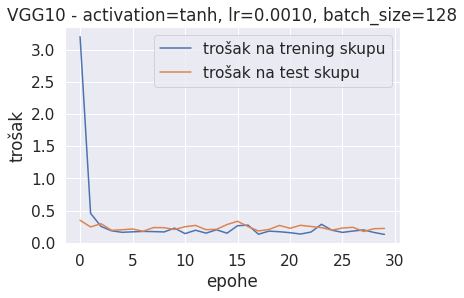

In [135]:
train_losses16=history16.history["loss"]
test_losses16=history16.history["val_loss"]

plt.plot(train_losses16,label="trošak na trening skupu")
plt.plot(test_losses16,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

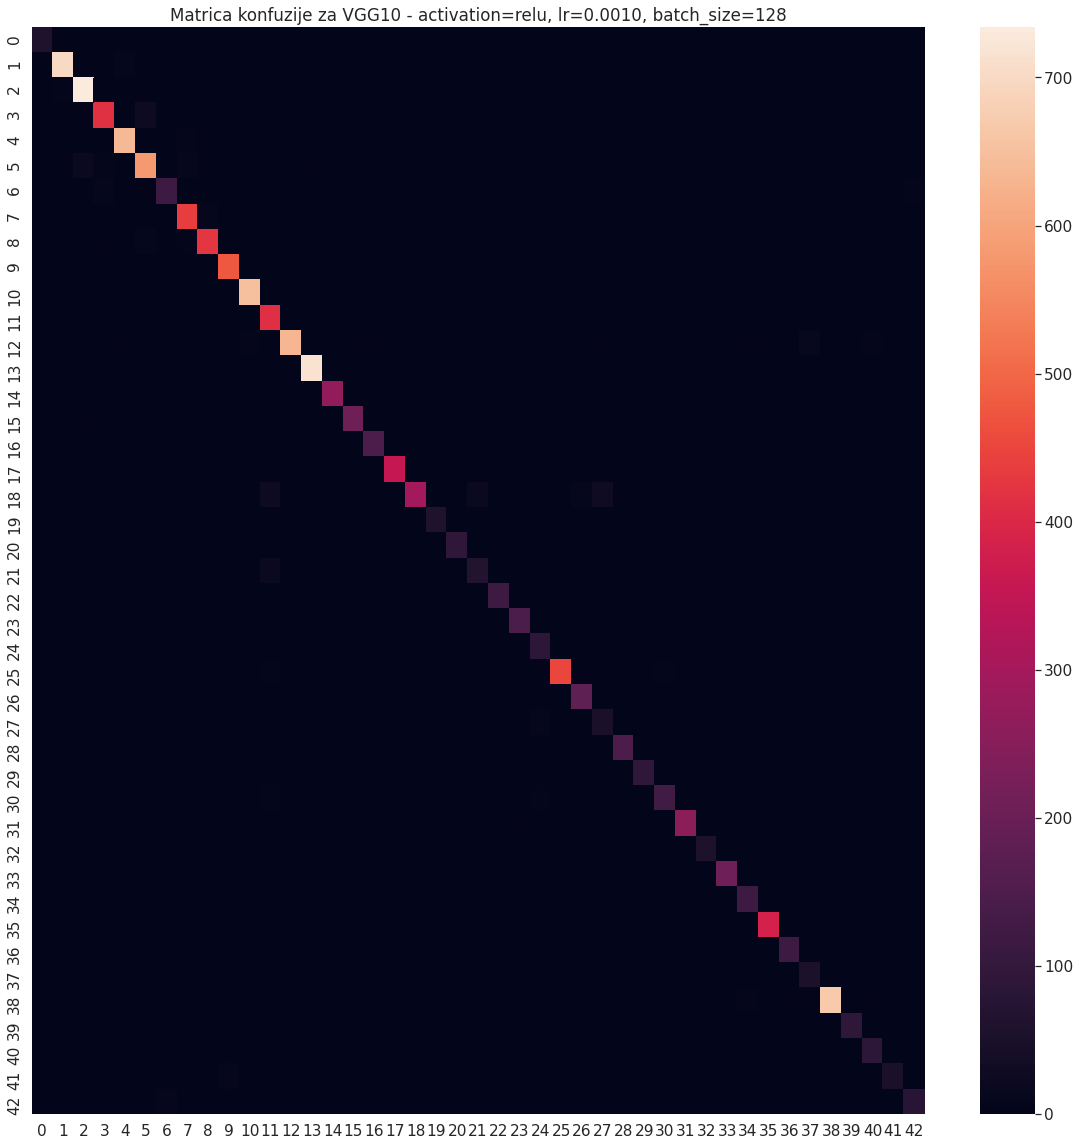

In [136]:
labele_pred_conf16=np.argmax(labele_pred16, axis=1)

labele_test_conf16=labele_test.reshape(labele_pred_conf16.shape[0],)

conf16=confusion_matrix(labele_test_conf16,labele_pred_conf16)

df_cm = pd.DataFrame(conf16, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [137]:
izvestaj16=classification_report(labele_test_conf16, labele_pred_conf16)

print(izvestaj16)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.98      0.97      0.97       720
           2       0.95      0.98      0.97       750
           3       0.94      0.93      0.93       450
           4       0.98      0.97      0.97       660
           5       0.92      0.92      0.92       630
           6       0.92      0.79      0.85       150
           7       0.93      0.97      0.95       450
           8       0.95      0.95      0.95       450
           9       0.98      1.00      0.99       480
          10       0.98      0.98      0.98       660
          11       0.87      0.98      0.92       420
          12       1.00      0.92      0.96       690
          13       0.99      0.99      0.99       720
          14       0.99      0.99      0.99       270
          15       0.95      0.98      0.96       210
          16       0.96      0.99      0.97       150
          17       0.98    

In [139]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.001
bs=256


model17=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history17 = model17.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 10s 58ms/step - loss: 6.0806 - accuracy: 0.3117 - val_loss: 0.4146 - val_accuracy: 0.8799
Epoch 2/30
154/154 [==============================] - 9s 57ms/step - loss: 0.4821 - accuracy: 0.9272 - val_loss: 0.2281 - val_accuracy: 0.9352
Epoch 3/30
154/154 [==============================] - 9s 59ms/step - loss: 0.1634 - accuracy: 0.9753 - val_loss: 0.1920 - val_accuracy: 0.9454
Epoch 4/30
154/154 [==============================] - 9s 58ms/step - loss: 0.0810 - accuracy: 0.9876 - val_loss: 0.1932 - val_accuracy: 0.9475
Epoch 5/30
154/154 [==============================] - 9s 58ms/step - loss: 0.0446 - accuracy: 0.9938 - val_loss: 0.1401 - val_accuracy: 0.9625
Epoch 6/30
154/154 [==============================] - 9s 58ms/step - loss: 0.0331 - accuracy: 0.9956 - val_loss: 0.1393 - val_accuracy: 0.9637
Epoch 7/30
154/154 [==============================] - 9s 58ms/step - loss: 0.0415 - accuracy: 0.9937 - val_loss: 0.2047 - val_accuracy: 0.950

In [140]:
labele_pred17=model17.predict(x=slike_test_norm)
eval17=model17.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2034 - accuracy: 0.9595


INFO:tensorflow:Assets written to: drive/MyDrive/assets


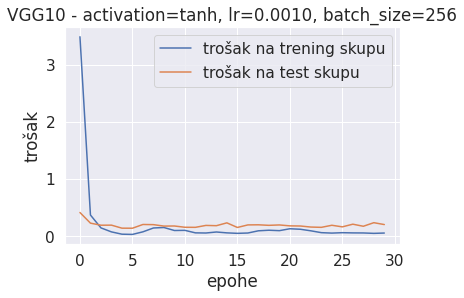

In [141]:
model17.save('drive/MyDrive')

train_losses17=history17.history["loss"]
test_losses17=history17.history["val_loss"]

plt.plot(train_losses17,label="trošak na trening skupu")
plt.plot(test_losses17,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

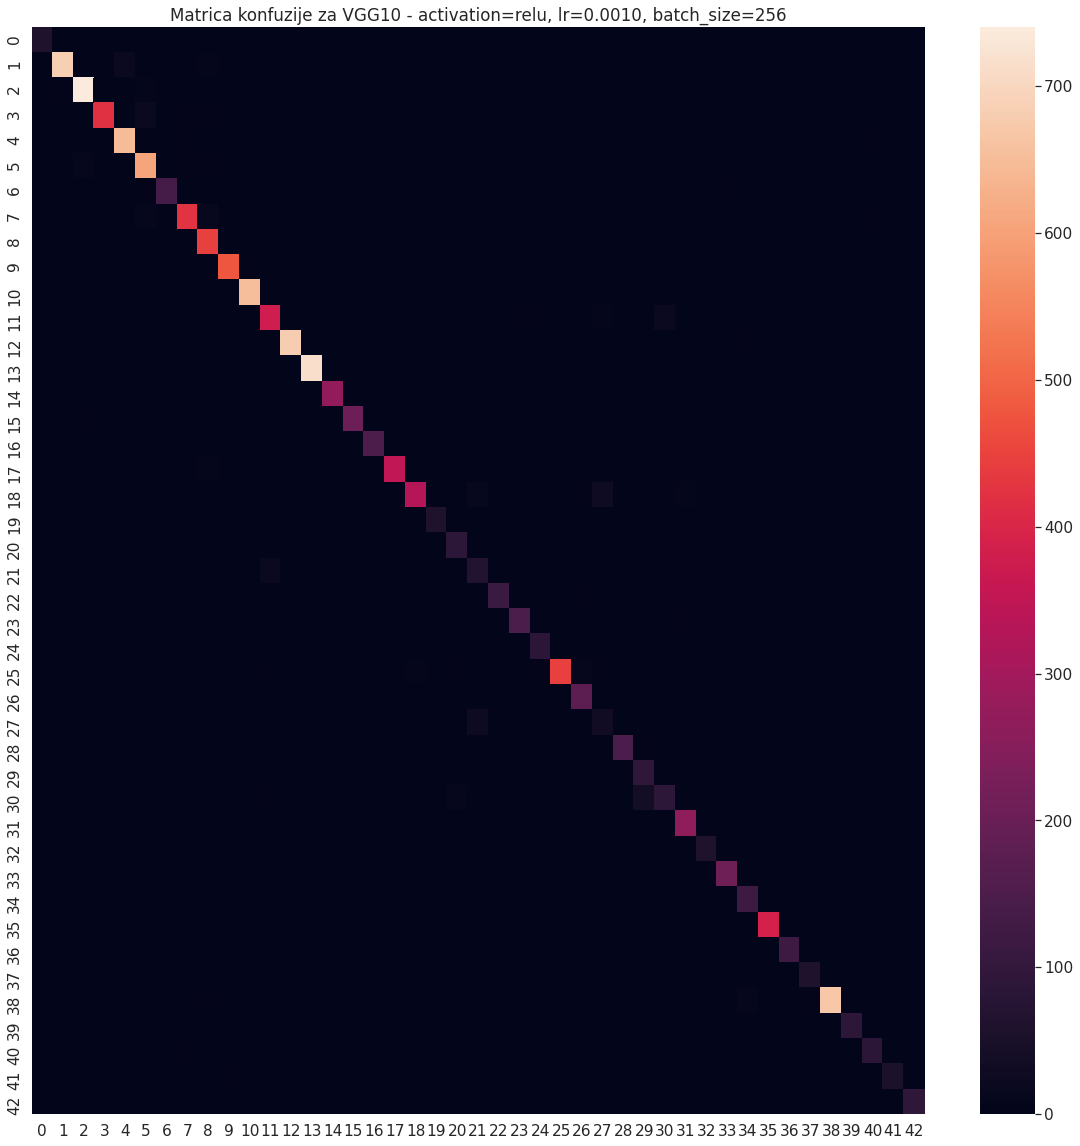

In [142]:
labele_pred_conf17=np.argmax(labele_pred17, axis=1)

labele_test_conf17=labele_test.reshape(labele_pred_conf17.shape[0],)

conf17=confusion_matrix(labele_test_conf17,labele_pred_conf17)

df_cm = pd.DataFrame(conf17, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [143]:

izvestaj17=classification_report(labele_test_conf17, labele_pred_conf17)

print(izvestaj17)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.99      0.95      0.97       720
           2       0.97      0.99      0.98       750
           3       0.99      0.94      0.96       450
           4       0.96      0.98      0.97       660
           5       0.93      0.96      0.95       630
           6       0.99      0.89      0.94       150
           7       0.95      0.94      0.95       450
           8       0.91      0.99      0.95       450
           9       0.99      0.99      0.99       480
          10       1.00      0.99      0.99       660
          11       0.93      0.90      0.92       420
          12       1.00      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       0.99      1.00      0.99       270
          15       0.99      0.97      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [147]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=32


model18=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history18 = model18.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 15s 11ms/step - loss: 6.1740 - accuracy: 0.3037 - val_loss: 0.5139 - val_accuracy: 0.8582
Epoch 2/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.6676 - accuracy: 0.9105 - val_loss: 0.2338 - val_accuracy: 0.9334
Epoch 3/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.2158 - accuracy: 0.9741 - val_loss: 0.1990 - val_accuracy: 0.9431
Epoch 4/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0962 - accuracy: 0.9900 - val_loss: 0.1479 - val_accuracy: 0.9561
Epoch 5/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0565 - accuracy: 0.9931 - val_loss: 0.1315 - val_accuracy: 0.9610
Epoch 6/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0558 - accuracy: 0.9933 - val_loss: 0.1185 - val_accuracy: 0.9645
Epoch 7/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0222 - accuracy: 0.9977 - val_loss: 0.1269 -

In [148]:
labele_pred18=model18.predict(x=slike_test_norm)
eval18=model18.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1387 - accuracy: 0.9700


In [149]:
model18.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


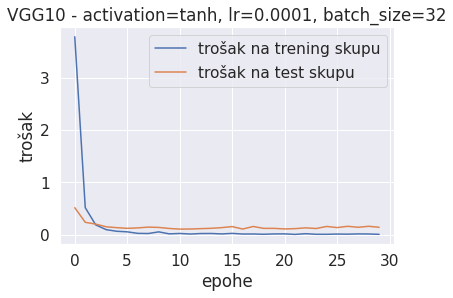

In [150]:
train_losses18=history18.history["loss"]
test_losses18=history18.history["val_loss"]

plt.plot(train_losses18,label="trošak na trening skupu")
plt.plot(test_losses18,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

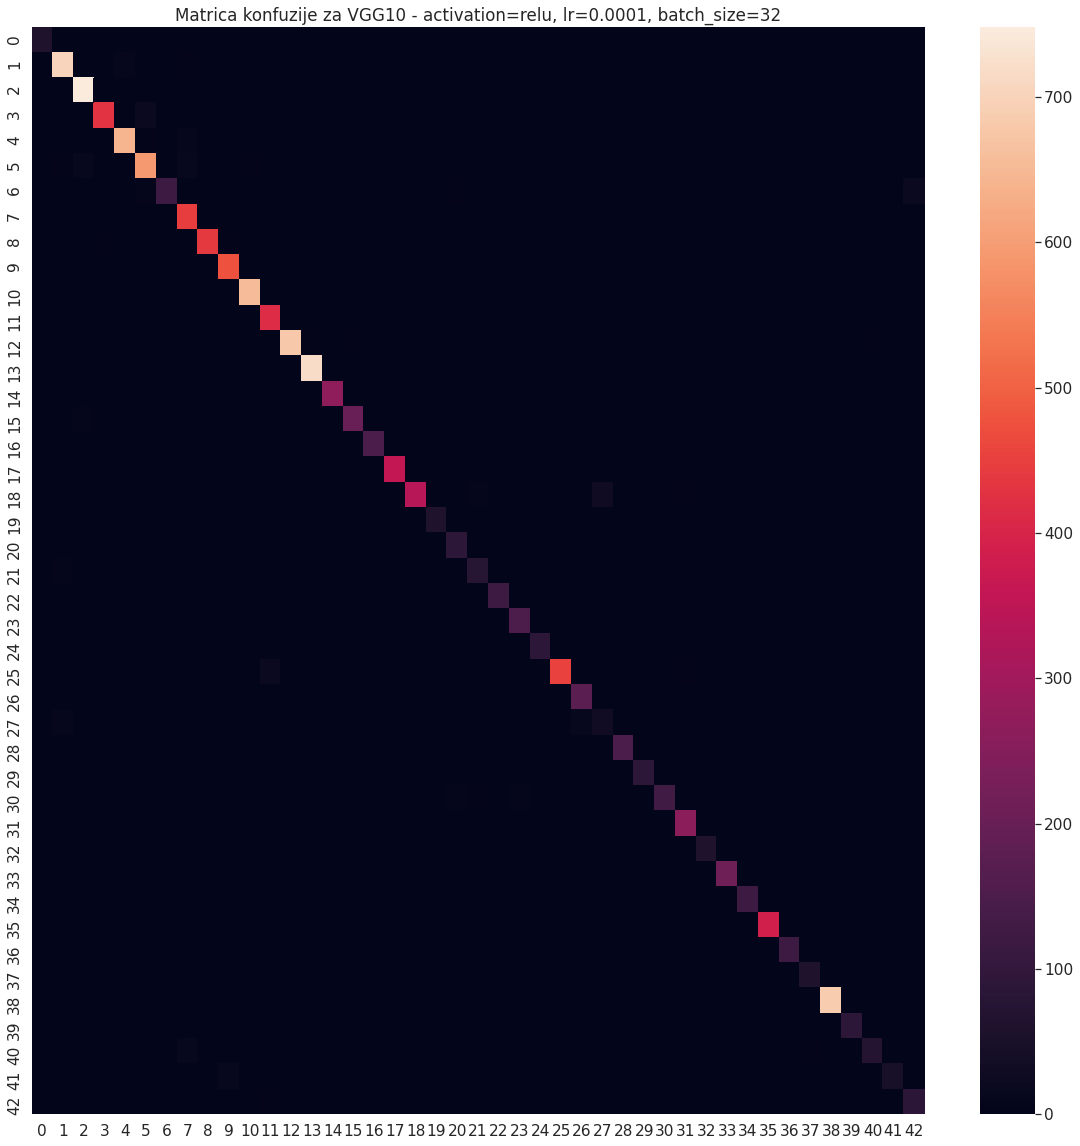

In [151]:
labele_pred_conf18=np.argmax(labele_pred18, axis=1)

labele_test_conf18=labele_test.reshape(labele_pred_conf18.shape[0],)

conf18=confusion_matrix(labele_test_conf18,labele_pred_conf18)

df_cm = pd.DataFrame(conf18, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [152]:
izvestaj18=classification_report(labele_test_conf18, labele_pred_conf18)

print(izvestaj18)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      0.98      0.97       720
           2       0.97      1.00      0.98       750
           3       0.99      0.95      0.97       450
           4       0.98      0.97      0.97       660
           5       0.95      0.94      0.94       630
           6       0.99      0.80      0.89       150
           7       0.91      0.99      0.95       450
           8       1.00      0.98      0.99       450
           9       0.96      1.00      0.98       480
          10       0.99      1.00      0.99       660
          11       0.94      0.99      0.96       420
          12       0.99      0.99      0.99       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      0.95      0.96       210
          16       0.99      0.99      0.99       150
          17       0.99    

In [153]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=64


model19=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history19 = model19.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 12s 18ms/step - loss: 6.8555 - accuracy: 0.2309 - val_loss: 0.7330 - val_accuracy: 0.7977
Epoch 2/30
613/613 [==============================] - 11s 18ms/step - loss: 1.1652 - accuracy: 0.8351 - val_loss: 0.3372 - val_accuracy: 0.9055
Epoch 3/30
613/613 [==============================] - 11s 18ms/step - loss: 0.3971 - accuracy: 0.9481 - val_loss: 0.2341 - val_accuracy: 0.9314
Epoch 4/30
613/613 [==============================] - 11s 18ms/step - loss: 0.1764 - accuracy: 0.9789 - val_loss: 0.1894 - val_accuracy: 0.9456
Epoch 5/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0978 - accuracy: 0.9889 - val_loss: 0.1708 - val_accuracy: 0.9478
Epoch 6/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0578 - accuracy: 0.9938 - val_loss: 0.1555 - val_accuracy: 0.9536
Epoch 7/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0393 - accuracy: 0.9958 - val_loss: 0.1355 - val_accuracy:

In [154]:
labele_pred19=model19.predict(x=slike_test_norm)
eval19=model19.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1791 - accuracy: 0.9546


In [155]:
model19.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


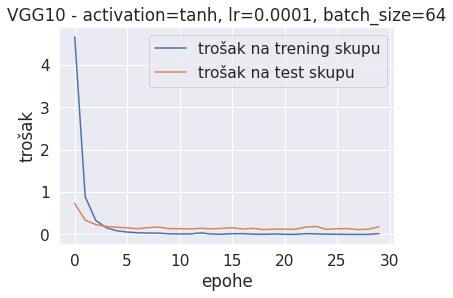

In [156]:
train_losses19=history19.history["loss"]
test_losses19=history19.history["val_loss"]

plt.plot(train_losses19,label="trošak na trening skupu")
plt.plot(test_losses19,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

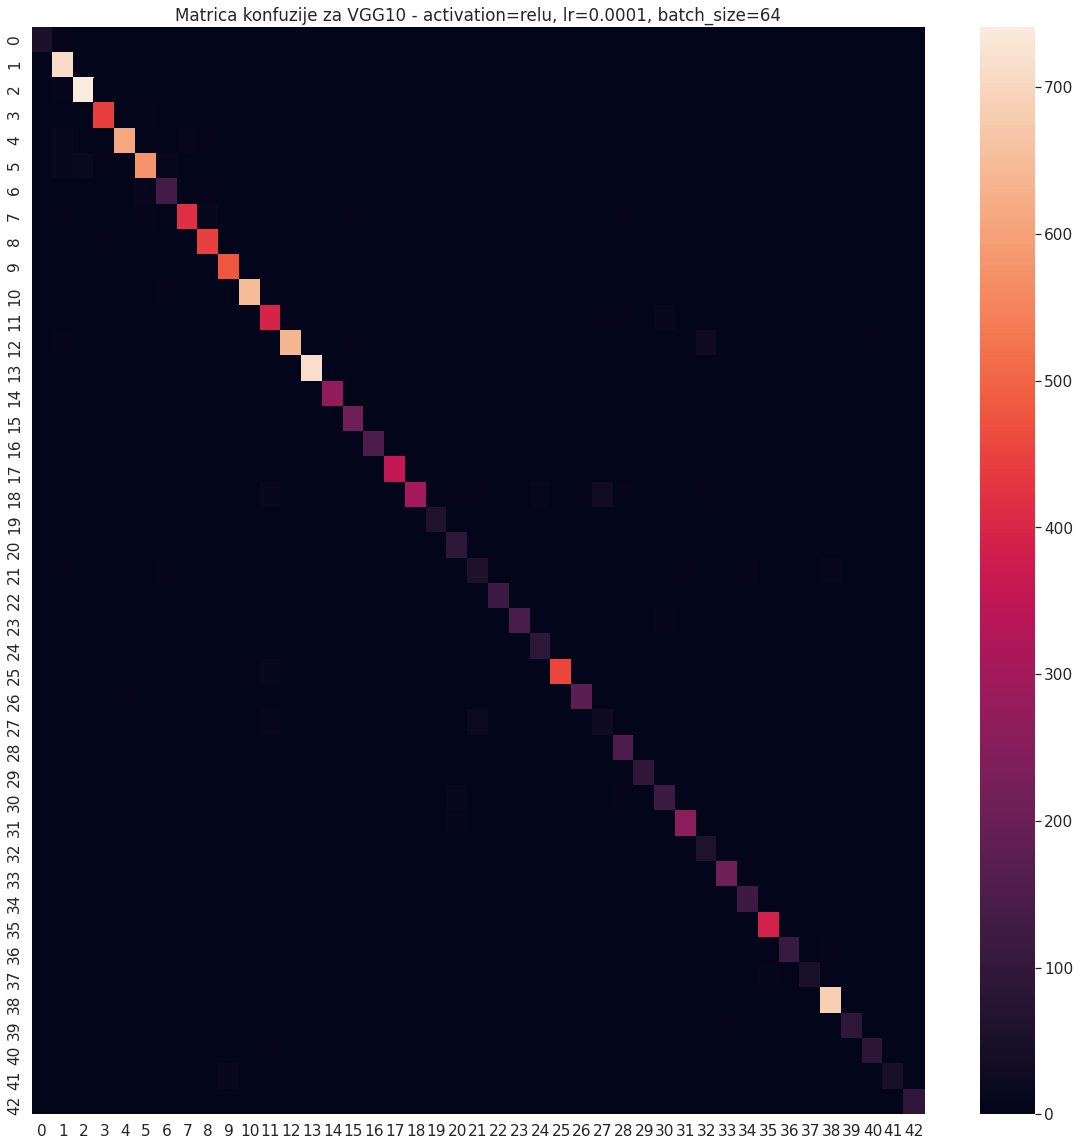

In [157]:
labele_pred_conf19=np.argmax(labele_pred19, axis=1)

labele_test_conf19=labele_test.reshape(labele_pred_conf19.shape[0],)

conf19=confusion_matrix(labele_test_conf19,labele_pred_conf19)

df_cm = pd.DataFrame(conf19, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [158]:
izvestaj19=classification_report(labele_test_conf19, labele_pred_conf19)

print(izvestaj19)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.92      0.99      0.95       720
           2       0.96      0.99      0.98       750
           3       0.98      0.98      0.98       450
           4       0.99      0.93      0.96       660
           5       0.95      0.92      0.93       630
           6       0.84      0.88      0.86       150
           7       0.97      0.93      0.95       450
           8       0.94      0.98      0.96       450
           9       0.97      1.00      0.98       480
          10       0.99      0.98      0.98       660
          11       0.90      0.94      0.92       420
          12       1.00      0.92      0.96       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       0.97      0.99      0.98       210
          16       0.98      0.99      0.99       150
          17       1.00    

In [159]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=128


model20=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history20 = model20.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 31ms/step - loss: 7.5795 - accuracy: 0.1635 - val_loss: 1.0978 - val_accuracy: 0.6843
Epoch 2/30
307/307 [==============================] - 9s 31ms/step - loss: 2.0065 - accuracy: 0.7287 - val_loss: 0.4957 - val_accuracy: 0.8625
Epoch 3/30
307/307 [==============================] - 10s 31ms/step - loss: 0.7404 - accuracy: 0.8959 - val_loss: 0.3239 - val_accuracy: 0.9105
Epoch 4/30
307/307 [==============================] - 10s 31ms/step - loss: 0.3710 - accuracy: 0.9543 - val_loss: 0.2589 - val_accuracy: 0.9257
Epoch 5/30
307/307 [==============================] - 10s 31ms/step - loss: 0.2138 - accuracy: 0.9745 - val_loss: 0.2183 - val_accuracy: 0.9392
Epoch 6/30
307/307 [==============================] - 10s 31ms/step - loss: 0.1339 - accuracy: 0.9846 - val_loss: 0.1929 - val_accuracy: 0.9445
Epoch 7/30
307/307 [==============================] - 10s 31ms/step - loss: 0.0923 - accuracy: 0.9906 - val_loss: 0.1742 - val_accuracy: 

In [160]:
labele_pred20=model20.predict(x=slike_test_norm)
eval20=model20.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1182 - accuracy: 0.9713


In [161]:
model20.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


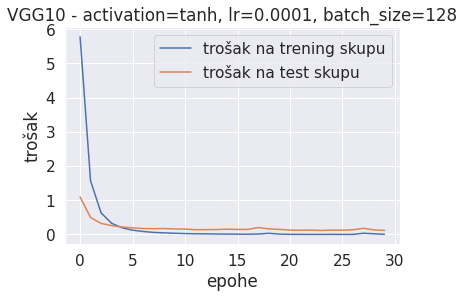

In [162]:
train_losses20=history20.history["loss"]
test_losses20=history20.history["val_loss"]

plt.plot(train_losses20,label="trošak na trening skupu")
plt.plot(test_losses20,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

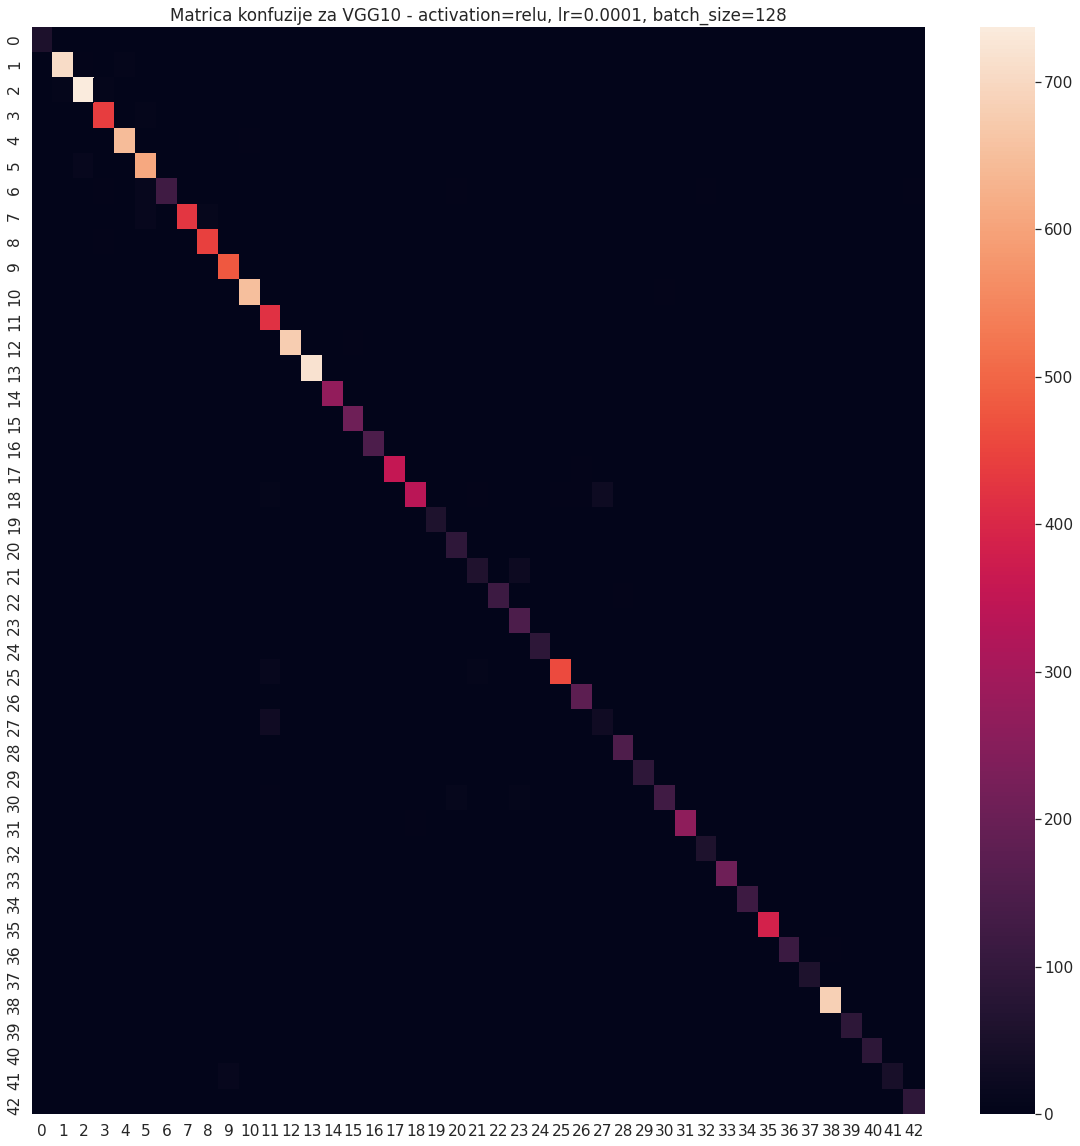

In [163]:
labele_pred_conf20=np.argmax(labele_pred20, axis=1)

labele_test_conf20=labele_test.reshape(labele_pred_conf20.shape[0],)

conf20=confusion_matrix(labele_test_conf20,labele_pred_conf20)

df_cm = pd.DataFrame(conf20, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [164]:
izvestaj20=classification_report(labele_test_conf20, labele_pred_conf20)

print(izvestaj20)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.98      0.98      0.98       720
           2       0.98      0.98      0.98       750
           3       0.97      0.97      0.97       450
           4       0.99      0.98      0.98       660
           5       0.94      0.97      0.96       630
           6       1.00      0.81      0.89       150
           7       0.99      0.95      0.97       450
           8       0.97      0.99      0.98       450
           9       0.97      1.00      0.99       480
          10       0.99      0.99      0.99       660
          11       0.88      1.00      0.94       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [165]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=256


model21=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history21 = model21.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 9s 57ms/step - loss: 8.1981 - accuracy: 0.1067 - val_loss: 1.6208 - val_accuracy: 0.5495
Epoch 2/30
154/154 [==============================] - 9s 56ms/step - loss: 3.2850 - accuracy: 0.5915 - val_loss: 0.7796 - val_accuracy: 0.7824
Epoch 3/30
154/154 [==============================] - 9s 57ms/step - loss: 1.3598 - accuracy: 0.8126 - val_loss: 0.4902 - val_accuracy: 0.8649
Epoch 4/30
154/154 [==============================] - 9s 57ms/step - loss: 0.7149 - accuracy: 0.9037 - val_loss: 0.3549 - val_accuracy: 0.9034
Epoch 5/30
154/154 [==============================] - 9s 57ms/step - loss: 0.4375 - accuracy: 0.9414 - val_loss: 0.2774 - val_accuracy: 0.9249
Epoch 6/30
154/154 [==============================] - 9s 57ms/step - loss: 0.2913 - accuracy: 0.9610 - val_loss: 0.2411 - val_accuracy: 0.9329
Epoch 7/30
154/154 [==============================] - 9s 58ms/step - loss: 0.1955 - accuracy: 0.9764 - val_loss: 0.2155 - val_accuracy: 0.9376

In [166]:
labele_pred21=model21.predict(x=slike_test_norm)
eval21=model21.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1380 - accuracy: 0.9613


In [167]:

model21.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


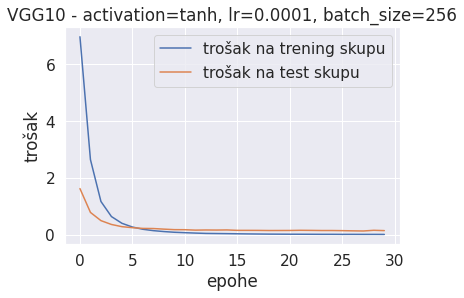

In [168]:
train_losses21=history21.history["loss"]
test_losses21=history21.history["val_loss"]

plt.plot(train_losses21,label="trošak na trening skupu")
plt.plot(test_losses21,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

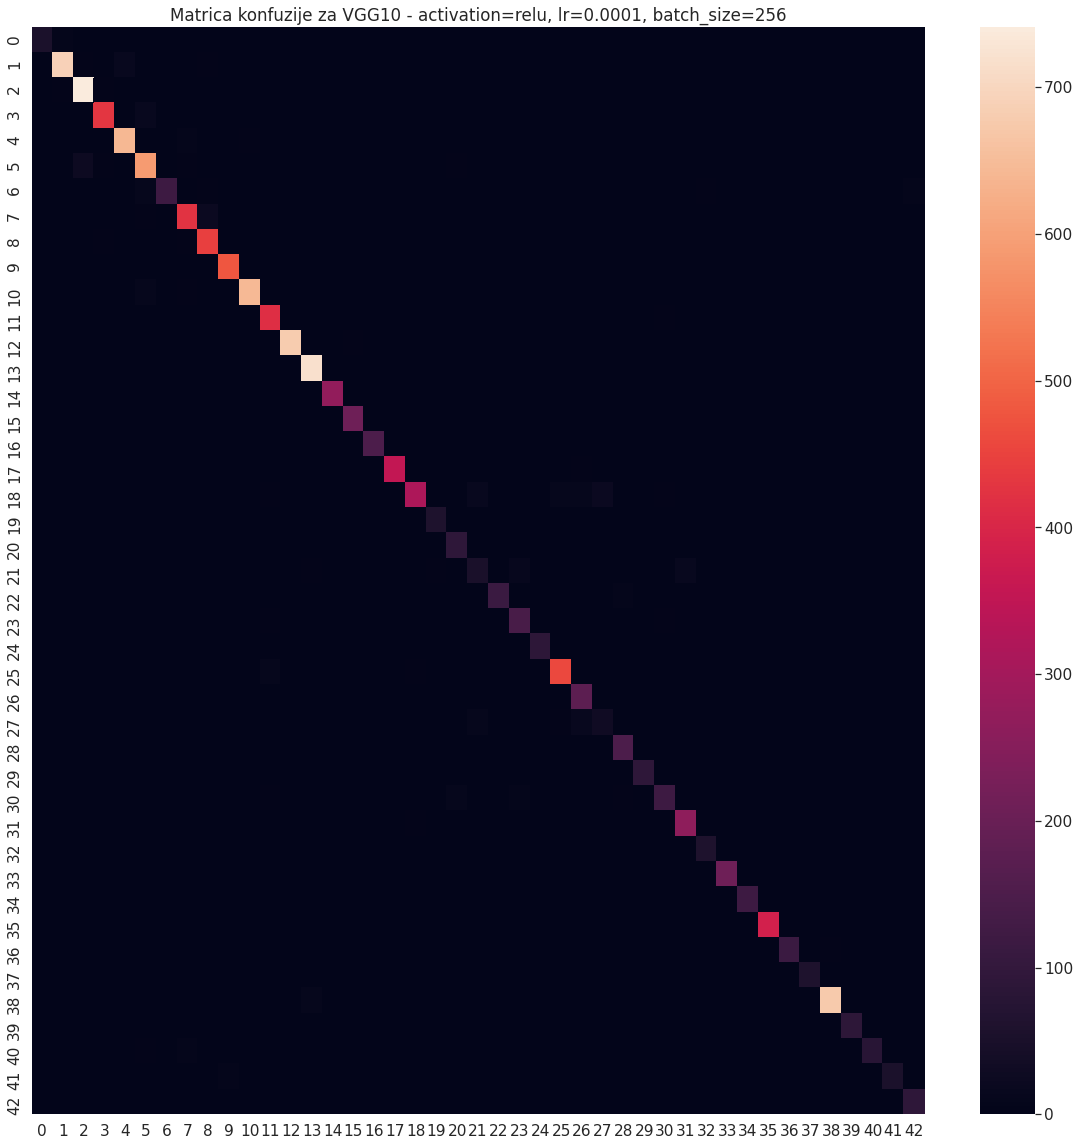

In [169]:
labele_pred_conf21=np.argmax(labele_pred21, axis=1)

labele_test_conf21=labele_test.reshape(labele_pred_conf21.shape[0],)

conf21=confusion_matrix(labele_test_conf21,labele_pred_conf21)


df_cm = pd.DataFrame(conf21, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [170]:
izvestaj21=classification_report(labele_test_conf21, labele_pred_conf21)

print(izvestaj21)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.98      0.96      0.97       720
           2       0.96      0.99      0.97       750
           3       0.98      0.96      0.97       450
           4       0.97      0.97      0.97       660
           5       0.93      0.93      0.93       630
           6       1.00      0.81      0.89       150
           7       0.94      0.94      0.94       450
           8       0.93      0.98      0.96       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.98       660
          11       0.95      0.99      0.97       420
          12       0.99      0.99      0.99       690
          13       0.97      1.00      0.99       720
          14       0.99      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [171]:
from keras.preprocessing.image import ImageDataGenerator

In [172]:
aug=ImageDataGenerator(rotation_range=15,width_shift_range=0.01,height_shift_range=0.01,zoom_range=0.3,shear_range=0.2)

In [173]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="relu"
lr=0.001
bs=128


model22=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history22 = model22.fit(aug.flow(slike_train_norm, labele_train_one_hot, batch_size=bs,seed=1),shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 21s 66ms/step - loss: 8.9551 - accuracy: 0.0247 - val_loss: 3.3684 - val_accuracy: 0.0519
Epoch 2/30
307/307 [==============================] - 20s 66ms/step - loss: 7.3833 - accuracy: 0.1168 - val_loss: 1.4993 - val_accuracy: 0.4637
Epoch 3/30
307/307 [==============================] - 20s 65ms/step - loss: 3.8769 - accuracy: 0.4423 - val_loss: 0.8735 - val_accuracy: 0.6874
Epoch 4/30
307/307 [==============================] - 20s 65ms/step - loss: 1.8893 - accuracy: 0.6929 - val_loss: 0.4444 - val_accuracy: 0.8786
Epoch 5/30
307/307 [==============================] - 20s 65ms/step - loss: 0.8417 - accuracy: 0.8638 - val_loss: 0.2407 - val_accuracy: 0.9432
Epoch 6/30
307/307 [==============================] - 20s 65ms/step - loss: 0.5258 - accuracy: 0.9241 - val_loss: 0.2094 - val_accuracy: 0.9491
Epoch 7/30
307/307 [==============================] - 20s 65ms/step - loss: 0.3878 - accuracy: 0.9449 - val_loss: 0.2264 - val_accuracy:

In [174]:
labele_pred22=model22.predict(x=slike_test_norm)
eval22=model22.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1021 - accuracy: 0.9785


In [219]:
model22.save('drive/MyDrive')

INFO:tensorflow:Assets written to: drive/MyDrive/assets


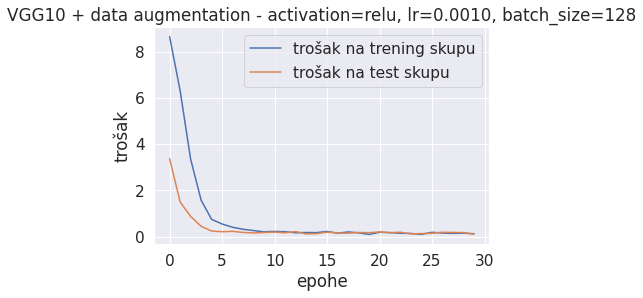

In [178]:
train_losses22=history22.history["loss"]
test_losses22=history22.history["val_loss"]

plt.plot(train_losses22,label="trošak na trening skupu")
plt.plot(test_losses22,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 + data augmentation - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

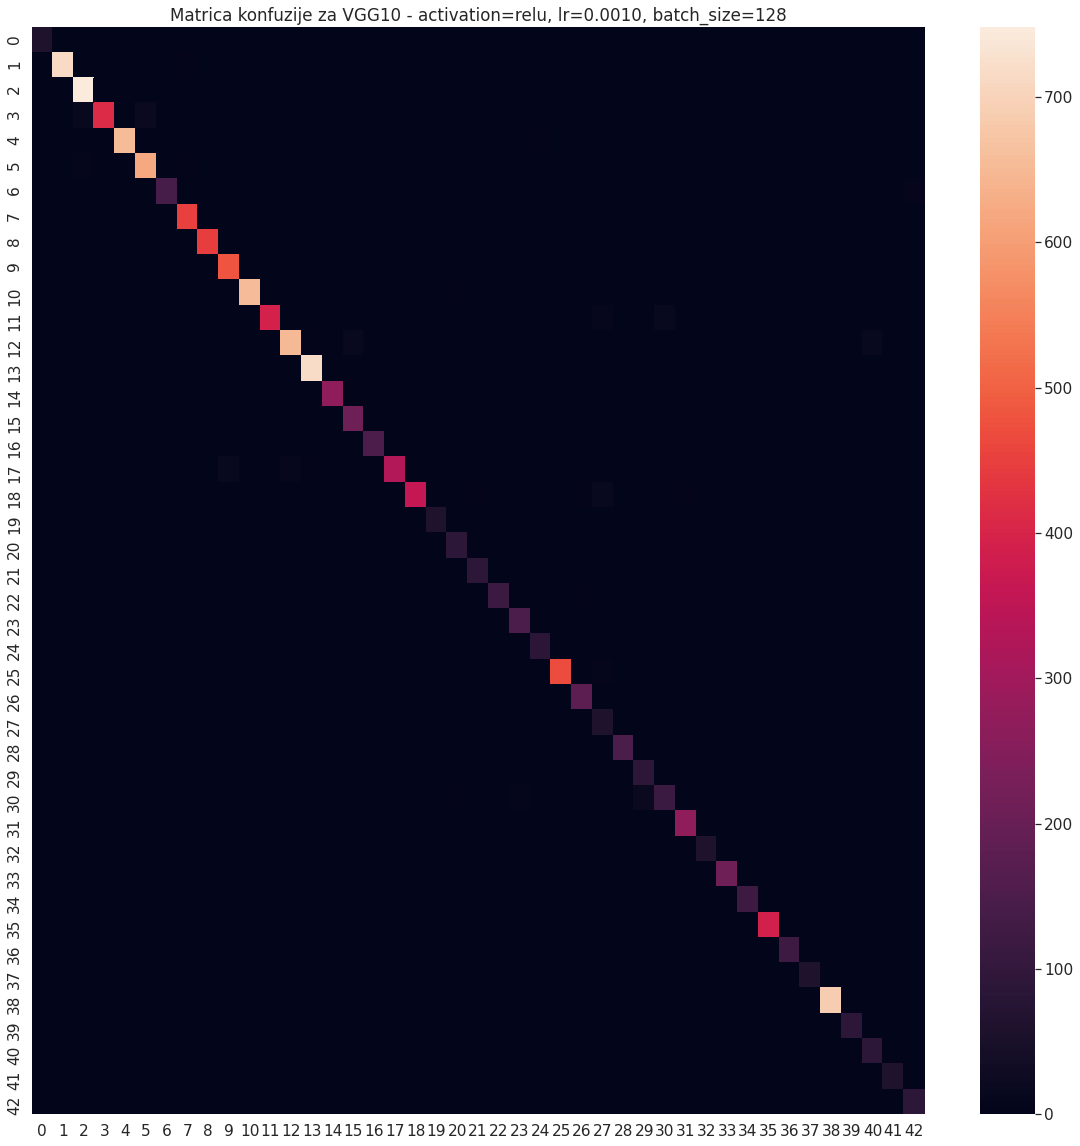

In [179]:
labele_pred_conf22=np.argmax(labele_pred22, axis=1)

labele_test_conf22=labele_test.reshape(labele_pred_conf22.shape[0],)

conf22=confusion_matrix(labele_test_conf22,labele_pred_conf22)

df_cm = pd.DataFrame(conf22, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [180]:
izvestaj22=classification_report(labele_test_conf22, labele_pred_conf22)

print(izvestaj22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.99      1.00       720
           2       0.97      1.00      0.98       750
           3       1.00      0.92      0.96       450
           4       0.99      0.99      0.99       660
           5       0.97      0.98      0.98       630
           6       1.00      0.93      0.97       150
           7       0.98      1.00      0.99       450
           8       1.00      0.99      1.00       450
           9       0.97      1.00      0.98       480
          10       1.00      0.99      1.00       660
          11       0.99      0.94      0.96       420
          12       0.99      0.94      0.96       690
          13       0.98      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [182]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=32


model23=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history23 = model23.fit(aug.flow(slike_train_norm, labele_train_one_hot, batch_size=bs,seed=1),shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 25s 20ms/step - loss: 6.8937 - accuracy: 0.2390 - val_loss: 0.7069 - val_accuracy: 0.7769
Epoch 2/30
1226/1226 [==============================] - 24s 20ms/step - loss: 1.5785 - accuracy: 0.7712 - val_loss: 0.2632 - val_accuracy: 0.9269
Epoch 3/30
1226/1226 [==============================] - 24s 19ms/step - loss: 0.7069 - accuracy: 0.8956 - val_loss: 0.2092 - val_accuracy: 0.9376
Epoch 4/30
1226/1226 [==============================] - 24s 20ms/step - loss: 0.4226 - accuracy: 0.9391 - val_loss: 0.1585 - val_accuracy: 0.9546
Epoch 5/30
1226/1226 [==============================] - 24s 20ms/step - loss: 0.2793 - accuracy: 0.9592 - val_loss: 0.1073 - val_accuracy: 0.9691
Epoch 6/30
1226/1226 [==============================] - 24s 20ms/step - loss: 0.2205 - accuracy: 0.9689 - val_loss: 0.1180 - val_accuracy: 0.9659
Epoch 7/30
1226/1226 [==============================] - 24s 20ms/step - loss: 0.1625 - accuracy: 0.9755 - val_loss: 0.1161 -

In [183]:
labele_pred23=model23.predict(x=slike_test_norm)
eval23=model23.evaluate(x=slike_test_norm,y=labele_test_one_hot)

model23.save('drive/MyDrive')

395/395 [==============================] - 2s 4ms/step - loss: 0.0702 - accuracy: 0.9806
INFO:tensorflow:Assets written to: drive/MyDrive/assets


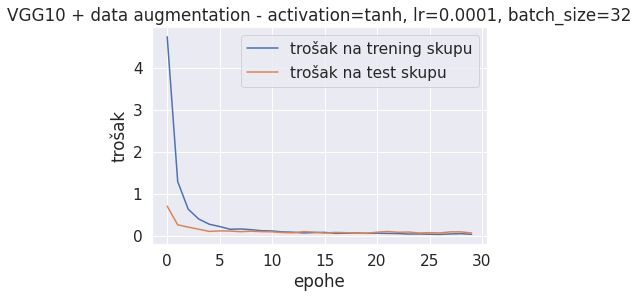

In [184]:
train_losses23=history23.history["loss"]
test_losses23=history23.history["val_loss"]

plt.plot(train_losses23,label="trošak na trening skupu")
plt.plot(test_losses23,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 + data augmentation - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

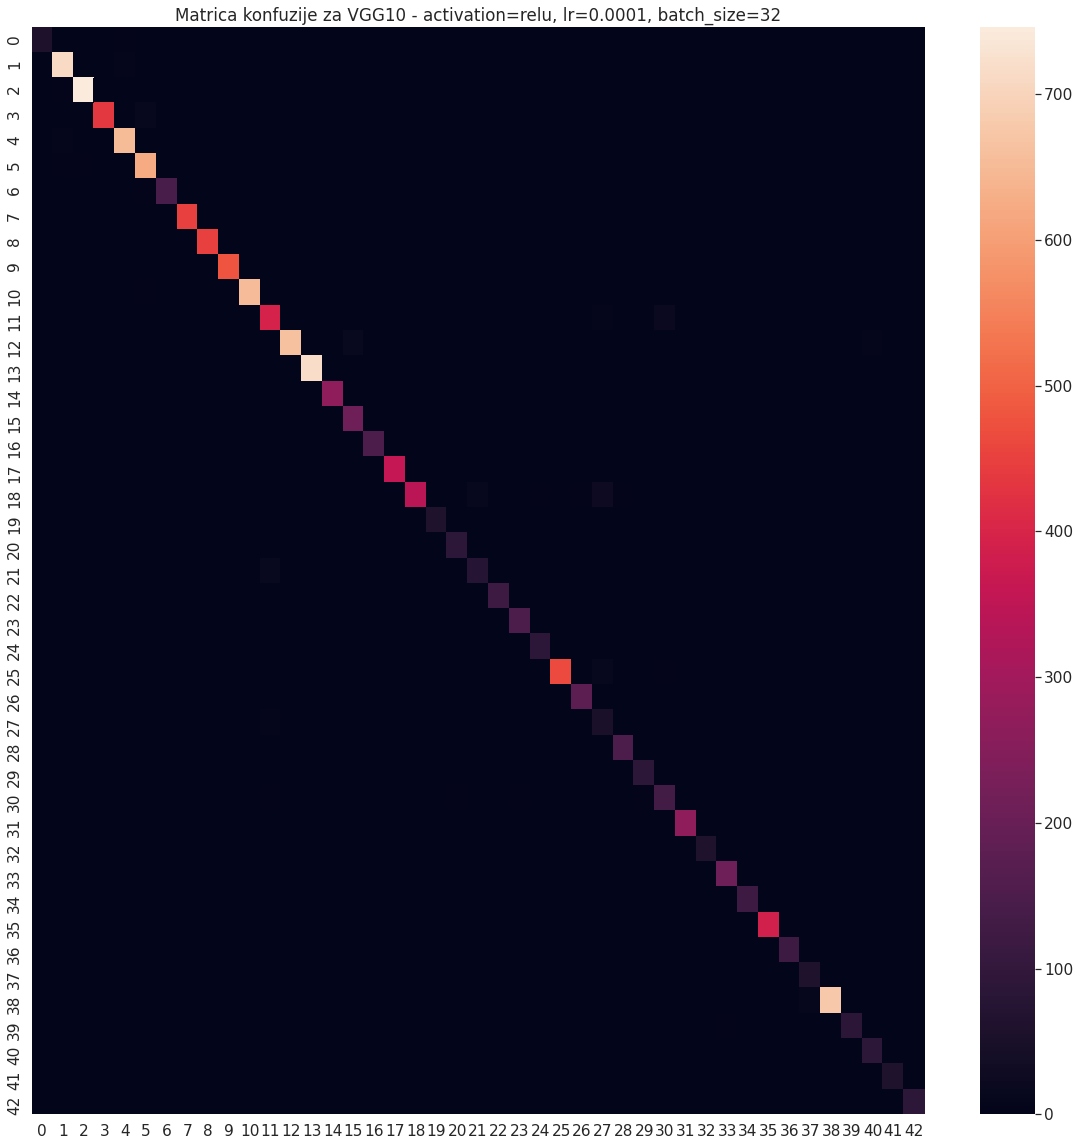

In [185]:
labele_pred_conf23=np.argmax(labele_pred23, axis=1)

labele_test_conf23=labele_test.reshape(labele_pred_conf23.shape[0],)

conf23=confusion_matrix(labele_test_conf23,labele_pred_conf23)


df_cm = pd.DataFrame(conf23, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [186]:
izvestaj23=classification_report(labele_test_conf23, labele_pred_conf23)

print(izvestaj23)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.98      0.99      0.99       720
           2       1.00      0.99      1.00       750
           3       0.99      0.97      0.98       450
           4       0.98      0.98      0.98       660
           5       0.97      0.99      0.98       630
           6       1.00      0.97      0.98       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       0.93      0.94      0.93       420
          12       1.00      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [187]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

activation="tanh"
lr=0.0001
bs=128


model24=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=lr,activation=activation)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history24 = model24.fit(aug.flow(slike_train_norm, labele_train_one_hot, batch_size=bs,seed=1),shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 21s 68ms/step - loss: 7.9464 - accuracy: 0.1286 - val_loss: 1.3190 - val_accuracy: 0.6103
Epoch 2/30
307/307 [==============================] - 21s 67ms/step - loss: 3.2386 - accuracy: 0.5809 - val_loss: 0.6951 - val_accuracy: 0.7980
Epoch 3/30
307/307 [==============================] - 21s 68ms/step - loss: 1.6946 - accuracy: 0.7585 - val_loss: 0.4112 - val_accuracy: 0.8848
Epoch 4/30
307/307 [==============================] - 21s 67ms/step - loss: 1.0487 - accuracy: 0.8456 - val_loss: 0.2724 - val_accuracy: 0.9212
Epoch 5/30
307/307 [==============================] - 21s 67ms/step - loss: 0.6809 - accuracy: 0.9000 - val_loss: 0.2100 - val_accuracy: 0.9392
Epoch 6/30
307/307 [==============================] - 21s 67ms/step - loss: 0.5065 - accuracy: 0.9263 - val_loss: 0.1665 - val_accuracy: 0.9492
Epoch 7/30
307/307 [==============================] - 21s 68ms/step - loss: 0.3629 - accuracy: 0.9464 - val_loss: 0.1636 - val_accuracy:

In [188]:
labele_pred24=model24.predict(x=slike_test_norm)
eval24=model24.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9799


INFO:tensorflow:Assets written to: drive/MyDrive/assets


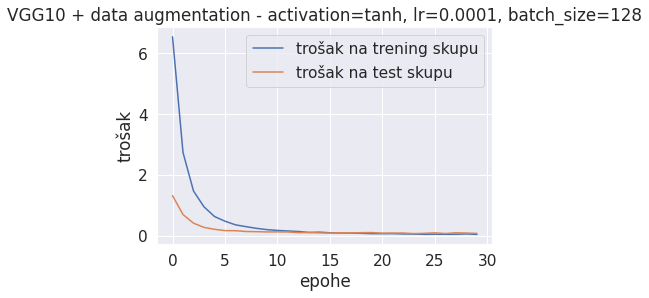

In [189]:
model24.save('drive/MyDrive')

train_losses24=history24.history["loss"]
test_losses24=history24.history["val_loss"]

plt.plot(train_losses24,label="trošak na trening skupu")
plt.plot(test_losses24,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("VGG10 + data augmentation - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()


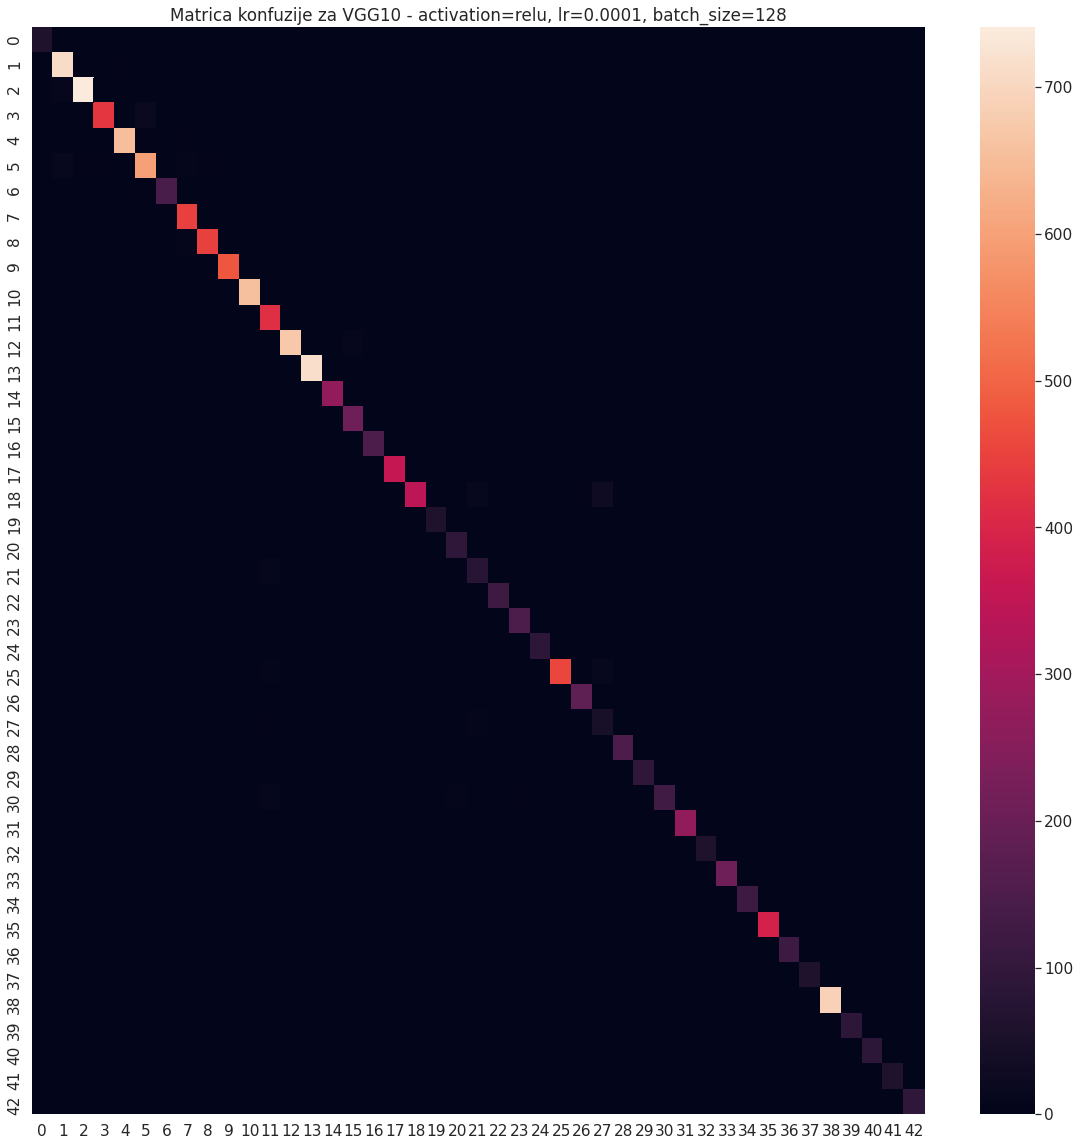

In [190]:
labele_pred_conf24=np.argmax(labele_pred24, axis=1)

labele_test_conf24=labele_test.reshape(labele_pred_conf24.shape[0],)

conf24=confusion_matrix(labele_test_conf24,labele_pred_conf24)


df_cm = pd.DataFrame(conf24, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za VGG10 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [191]:
izvestaj24=classification_report(labele_test_conf24, labele_pred_conf24)

print(izvestaj24)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.97      0.99      0.98       720
           2       0.99      0.99      0.99       750
           3       0.98      0.95      0.97       450
           4       0.99      0.99      0.99       660
           5       0.96      0.95      0.95       630
           6       1.00      0.95      0.97       150
           7       0.96      0.99      0.98       450
           8       0.98      0.99      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      0.99       660
          11       0.93      1.00      0.96       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.98       210
          16       0.98      1.00      0.99       150
          17       1.00    

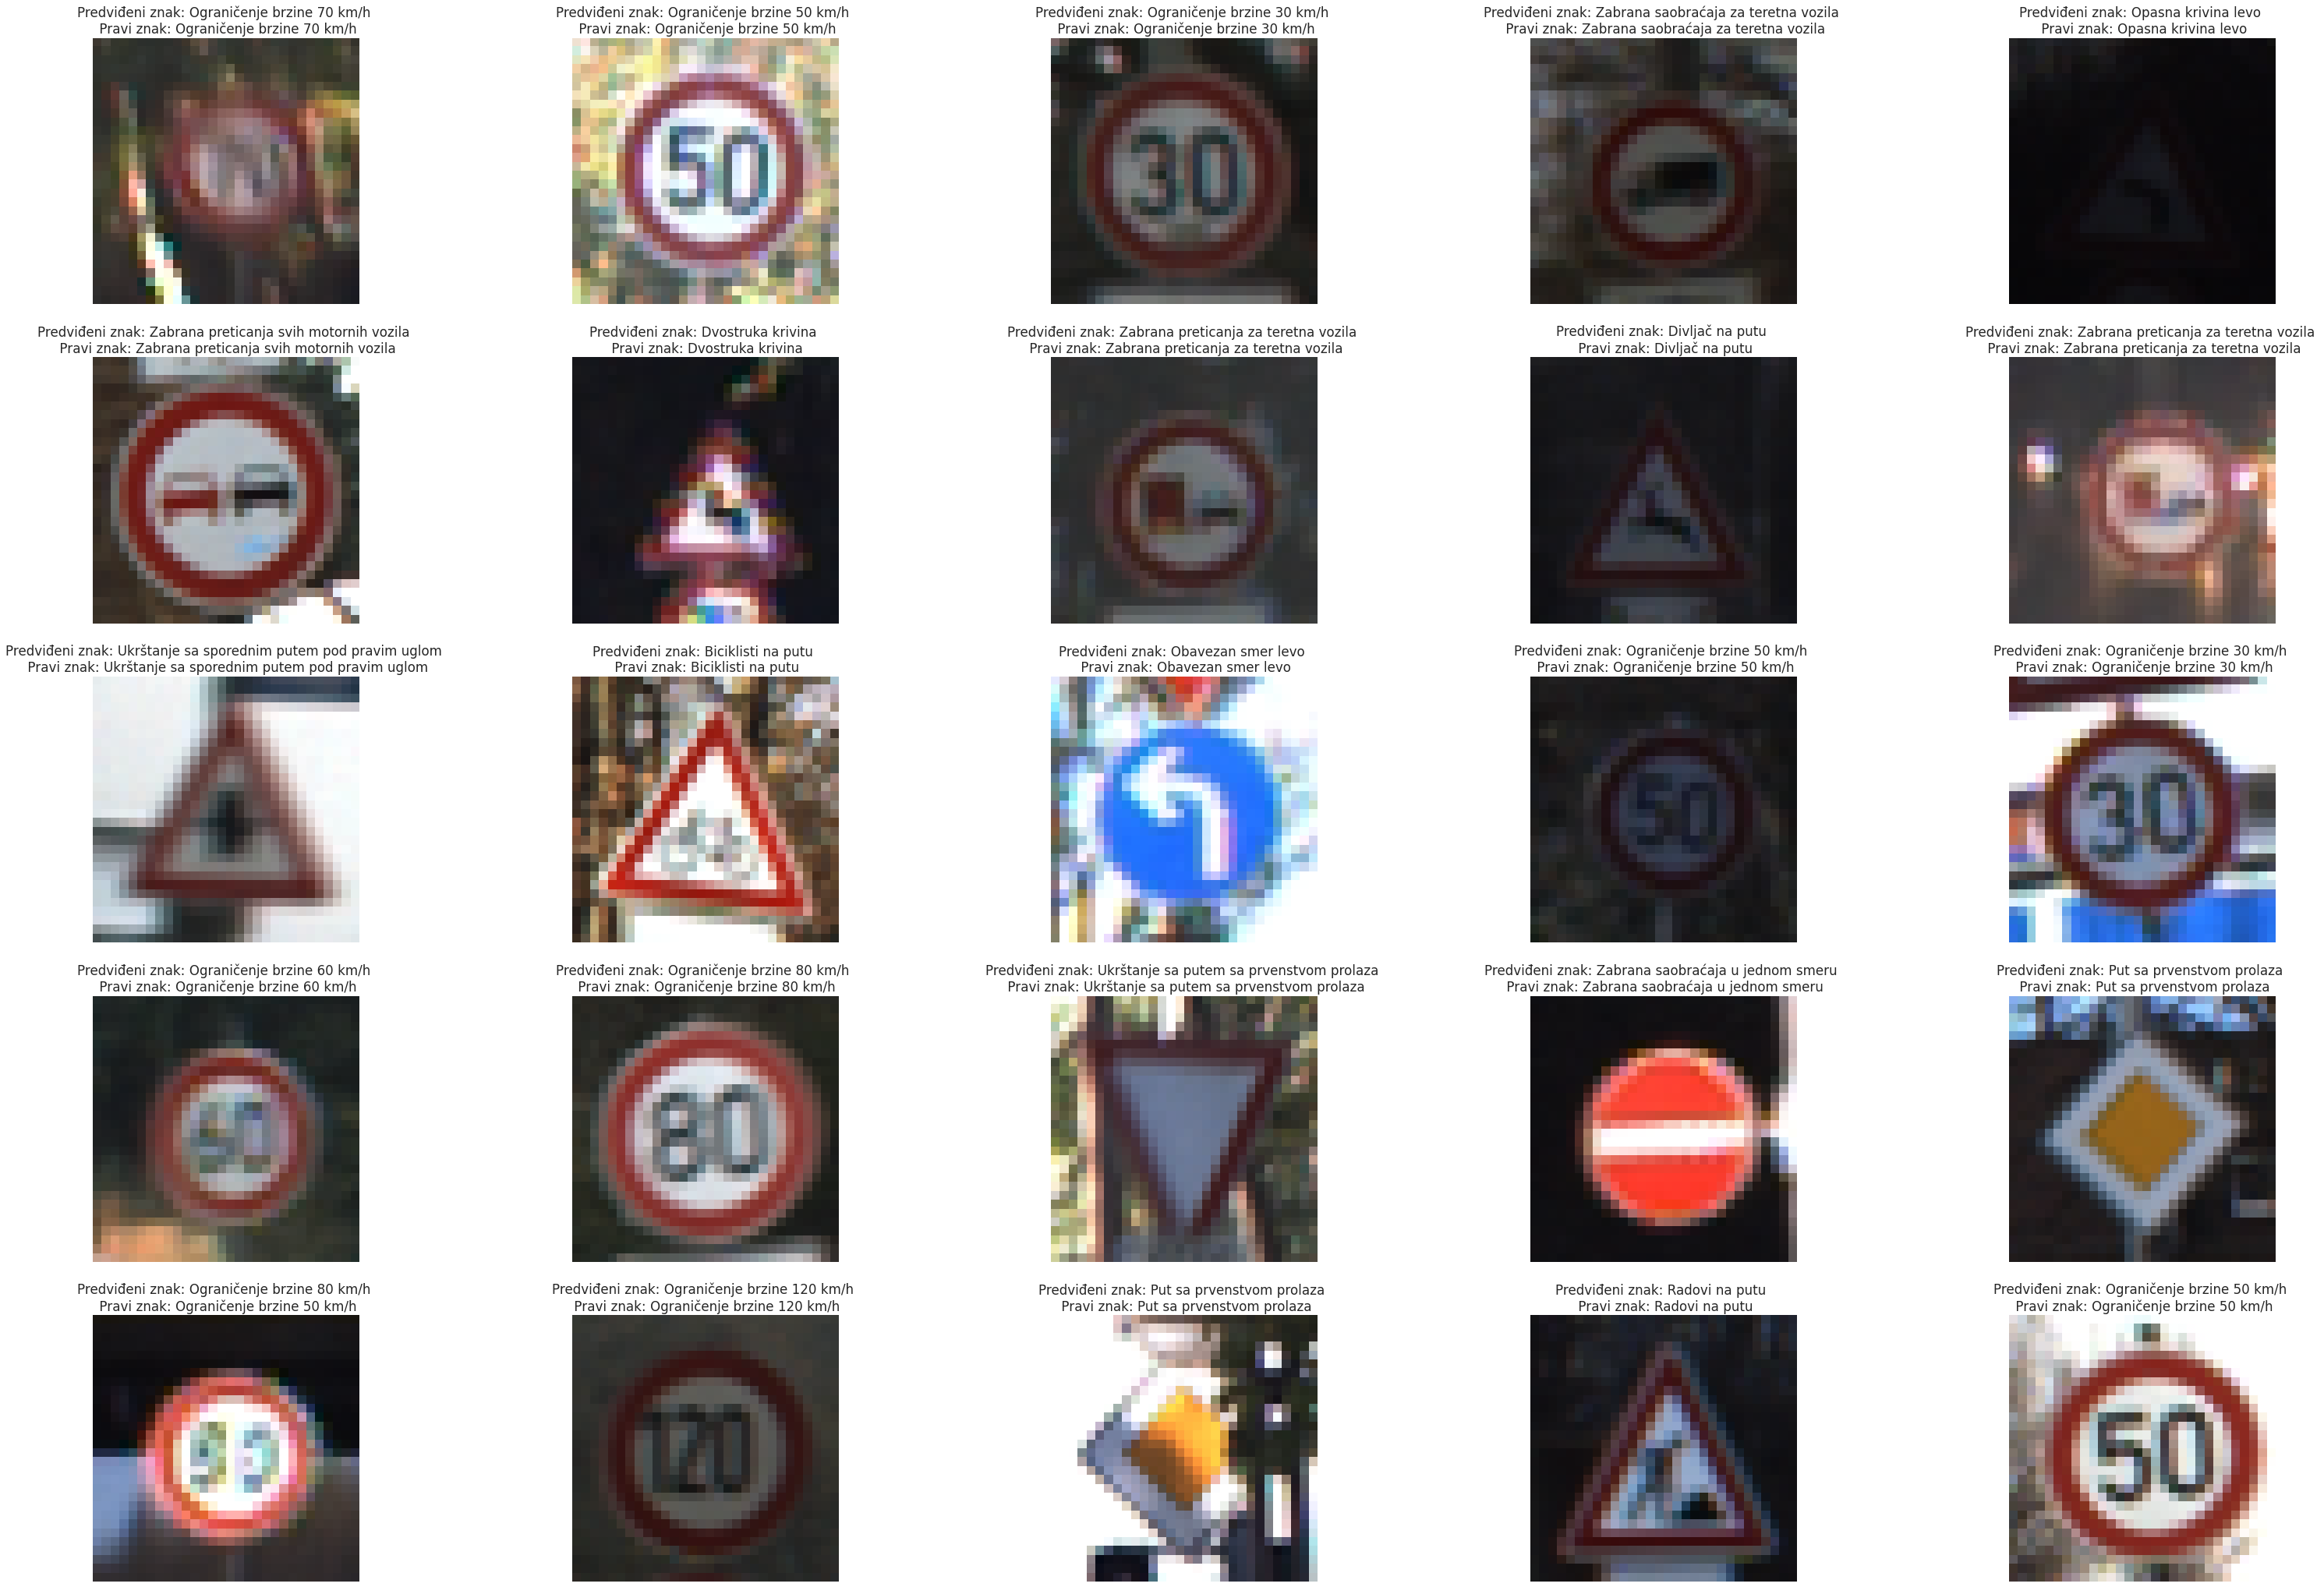

In [213]:
m_test=slike_test.shape[0]

np.random.seed(1)

indeksi_test=list(np.random.permutation(m_test))

Slike_test_permutovane=slike_test[indeksi_test,:,:,:]
Labele_test_permutovane=labele_test[:,indeksi_test]
Labele_pred_permutovane=labele_pred_conf22[indeksi_test].reshape(1,m_test)
rows=5
cols=5



f, axarr = plt.subplots(5,5)
#plt.rcParams["figure.figsize"] = (10,10)

plt.subplots_adjust(right=7,top=7)

k=0

for i in range(5):
  for j in range(5):
    axarr[i,j].imshow(Slike_test_permutovane[k])
    axarr[i,j].axis('off')
    labela_test=int(Labele_test_permutovane[:,k])
    labela_pred=int(Labele_pred_permutovane[:,k])
    axarr[i,j].set_title("Predviđeni znak: %s \n Pravi znak: %s"%(klase[labela_test],klase[labela_pred]))
    
    k=k+1

plt.show()